# Q1 Data Cleaning

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import missingno as miss_no

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In C:\Users\goela\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\goela\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\goela\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\goela\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\goela\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Reading the dataset containing the global COVID data

In [2]:
# read and describe the data set

df=pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362


In [3]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20
count,270.000000,270.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,...,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02
mean,20.817839,23.439277,2.047970,2.413284,3.472325,5.291513,7.815498,10.800738,20.583026,22.756458,...,2.477410e+05,2.496506e+05,2.520057e+05,2.544794e+05,2.599869e+05,2.625607e+05,2.648659e+05,2.668889e+05,2.688210e+05,2.711291e+05
std,25.171460,72.529836,27.026899,27.125204,33.769345,46.999290,65.681295,88.495349,217.167147,218.495596,...,1.181370e+06,1.191980e+06,1.204726e+06,1.217750e+06,1.233569e+06,1.247233e+06,1.259992e+06,1.270951e+06,1.281824e+06,1.293577e+06
min,-51.796300,-172.104600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.424864,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.350000e+02,6.450000e+02,6.485000e+02,6.520000e+02,6.565000e+02,6.575000e+02,6.760000e+02,6.760000e+02,6.775000e+02,6.810000e+02
50%,22.041450,20.972650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.570000e+03,7.579000e+03,7.806000e+03,8.104000e+03,8.345000e+03,8.345000e+03,8.345000e+03,8.345000e+03,8.345000e+03,8.498000e+03
75%,41.143200,83.380449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.015785e+05,1.023800e+05,1.035615e+05,1.045090e+05,1.055795e+05,1.066685e+05,1.076570e+05,1.097480e+05,1.112315e+05,1.133250e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,1.481918e+07,1.501150e+07,1.523127e+07,1.545407e+07,1.568016e+07,1.591329e+07,1.613424e+07,1.632562e+07,1.651842e+07,1.671678e+07


### Analyzing the data only till 10th Dec 2020

In [4]:
df = df.loc[:,:'12/10/20']

#### Checking for the missing data in the dataset

Text(0.5, 1.0, 'Missing data visualization')

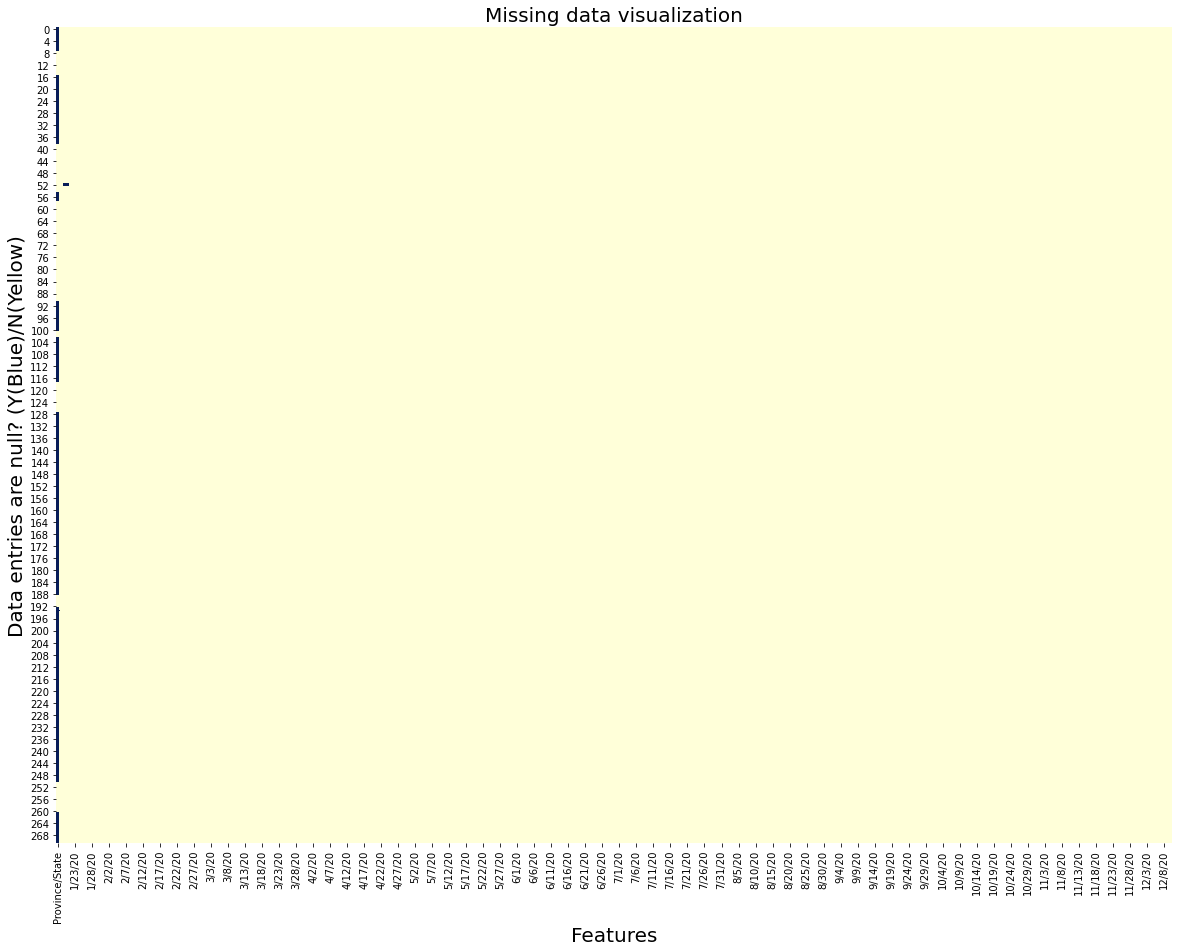

In [5]:
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(df.isnull(), cmap="YlGnBu", xticklabels = 5,  cbar=False)

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Data entries are null? (Y(Blue)/N(Yellow)', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

Text(0.5, 1.0, 'Missing data visualization')

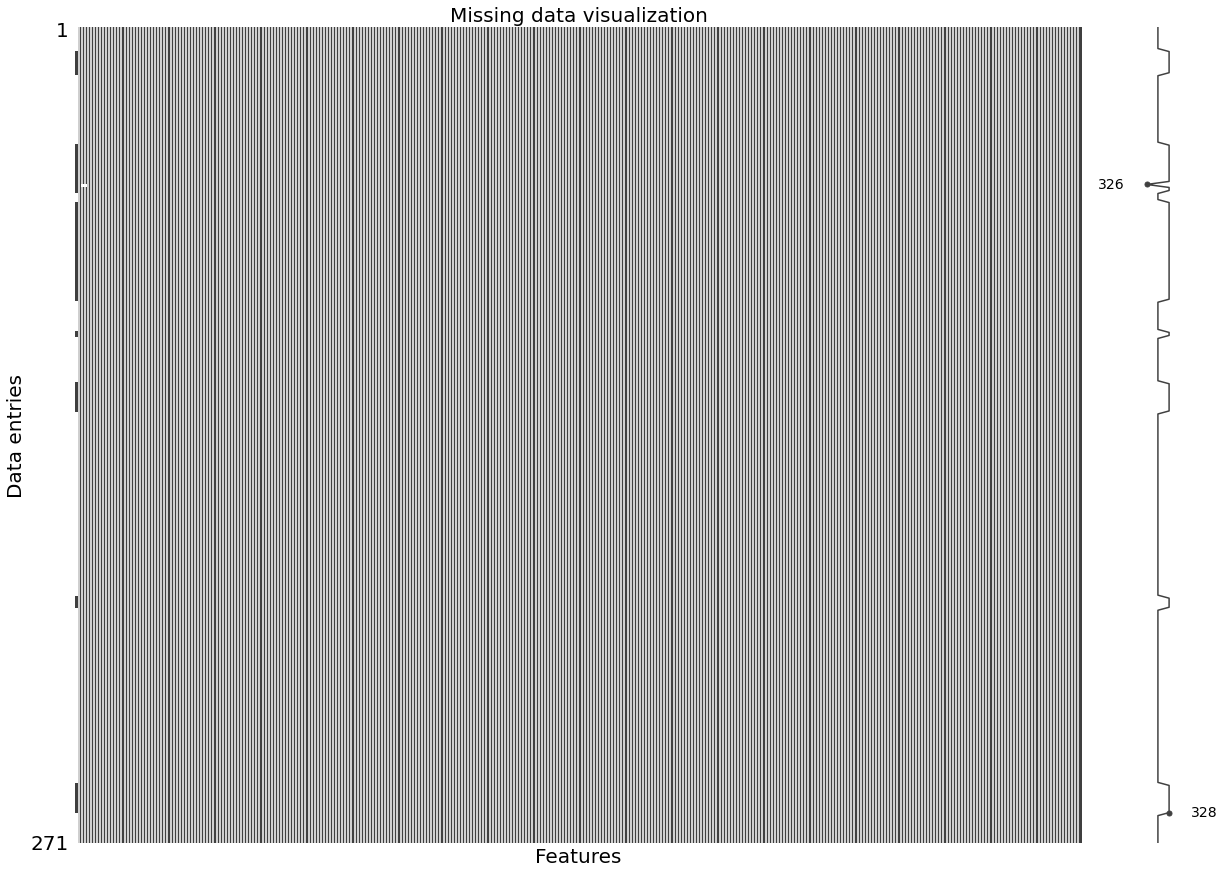

In [6]:
ax = miss_no.matrix(df,figsize=(20,15))

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Data entries', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

There are some missing values in the columns, which are not useful, at this stage of analysis, so they can be ignored

# Q2 Data Visualization and Exploratory Data Analysis

## 1. Studying the total number of COVID cases based on the country

In [7]:
gra1 = df.groupby('Country/Region')['12/10/20'].sum().sort_values(ascending=False).reset_index()
gra1

,Country/Region,12/10/20
0,US,15680159
1,India,9796744
2,Brazil,6781799
3,Russia,2546113
4,France,2393590
...,...,...
186,Solomon Islands,17
187,MS Zaandam,9
188,Marshall Islands,4
189,Samoa,2


## Plotting the total number of COVID cases (in decreasing order) for the 25 worst affected countries

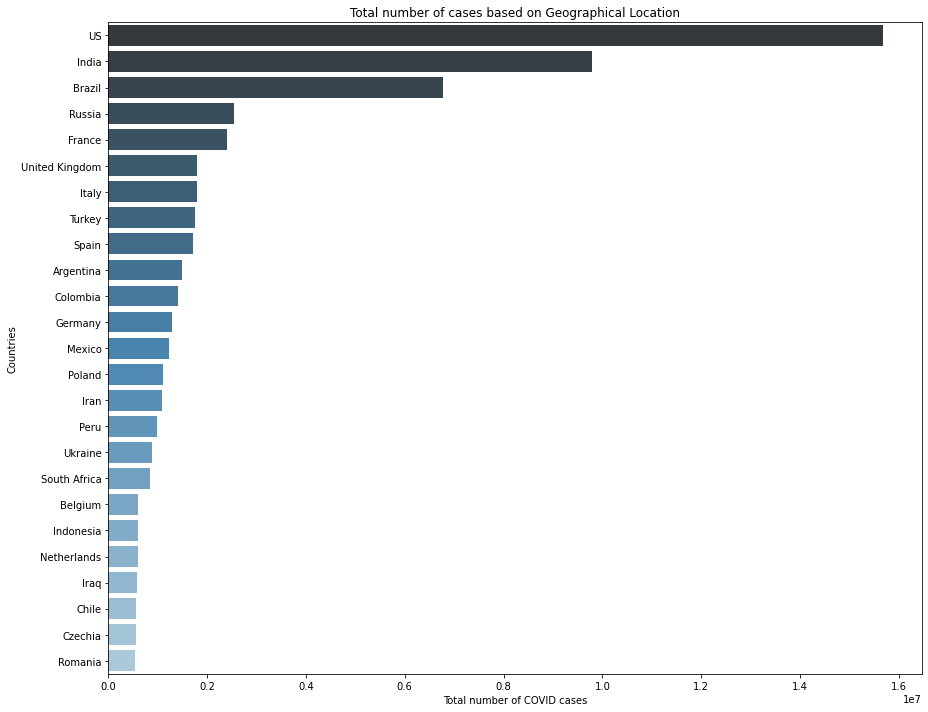

In [8]:
fig, ax = plt.subplots(figsize=(13, 10))
ax = sns.barplot(y='Country/Region', x='12/10/20', data=gra1[:25], palette="Blues_d")
ax.set_ylabel("Countries")
ax.set_xlabel("Total number of COVID cases")
ax.set_title("Total number of cases based on Geographical Location")
plt.tight_layout()
plt.show()

#### From this bar plot it can be inferred that US, India and Brazil are the three worst affected countries followed by Russia and France

#### So for the rest of our analysis we can focus on these top 5 countries and can neglect others

In [9]:
df2=df.copy()

In [10]:
# Converting the dates to DateTime format

df2.columns = df2.columns[:4].tolist() + pd.to_datetime(df2.columns[4:]).tolist()
df2

,Province/State,Country/Region,Lat,Long,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1351,1358,1361,1361,1365,1366,1367,1377,1381,1385
267,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,88004,90192,92708,94676,96098,98038,99758,101109,102992,104879
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2197,2217,2239,2267,2304,2337,2383,2078,2079,2081
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,17665,17700,17730,17857,17898,17916,17931,17963,18062,18091


In [11]:
# getting the list of 10 worst affected countries

top_10 = gra1[:10]['Country/Region']

In [12]:
# dropping the unnecessary columns

d2 = df2.drop(['Province/State','Lat','Long'],axis=1)
d2

,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053
1,Albania,0,0,0,0,0,0,0,0,0,...,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061
2,Algeria,0,0,0,0,0,0,0,0,0,...,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579
3,Andorra,0,0,0,0,0,0,0,0,0,...,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190
4,Angola,0,0,0,0,0,0,0,0,0,...,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,Vietnam,0,2,2,2,2,2,2,2,2,...,1351,1358,1361,1361,1365,1366,1367,1377,1381,1385
267,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,88004,90192,92708,94676,96098,98038,99758,101109,102992,104879
268,Yemen,0,0,0,0,0,0,0,0,0,...,2197,2217,2239,2267,2304,2337,2383,2078,2079,2081
269,Zambia,0,0,0,0,0,0,0,0,0,...,17665,17700,17730,17857,17898,17916,17931,17963,18062,18091


In [13]:
# grouping the COVID cases from provincial data to country data

gra2 = d2.groupby('Country/Region').sum().reset_index()
gra2

,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053
1,Albania,0,0,0,0,0,0,0,0,0,...,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061
2,Algeria,0,0,0,0,0,0,0,0,0,...,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579
3,Andorra,0,0,0,0,0,0,0,0,0,...,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190
4,Angola,0,0,0,0,0,0,0,0,0,...,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,0,2,2,2,2,2,2,2,2,...,1351,1358,1361,1361,1365,1366,1367,1377,1381,1385
187,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,88004,90192,92708,94676,96098,98038,99758,101109,102992,104879
188,Yemen,0,0,0,0,0,0,0,0,0,...,2197,2217,2239,2267,2304,2337,2383,2078,2079,2081
189,Zambia,0,0,0,0,0,0,0,0,0,...,17665,17700,17730,17857,17898,17916,17931,17963,18062,18091


In [14]:
# Sorting the dataset based on the number of COVID cases

s_by = gra2.columns[-1]
grap2 = gra2[gra2['Country/Region'].isin(top_10)].sort_values(by=s_by, ascending=False).reset_index()
grap2 = grap2.drop(['index'],axis=1)
grap2

,Country/Region,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,US,1,1,2,2,5,5,5,6,6,...,13775956,13978418,14198035,14427608,14642851,14819178,15011499,15231271,15454074,15680159
1,India,0,0,0,0,0,0,0,0,1,...,9499413,9534964,9571559,9608211,9644222,9677203,9703770,9735850,9767371,9796744
2,Brazil,0,0,0,0,0,0,0,0,0,...,6386787,6436650,6487084,6533968,6577177,6603540,6623911,6674999,6728452,6781799
3,Russia,0,0,0,0,0,0,0,0,0,...,2302062,2327105,2354934,2382012,2410462,2439163,2466961,2492713,2518551,2546113
4,France,0,0,2,3,3,3,4,5,5,...,2285238,2299466,2312253,2323764,2336646,2347595,2351006,2365043,2379718,2393590
5,United Kingdom,0,0,0,0,0,0,0,0,0,...,1647230,1663467,1678418,1694800,1710379,1727751,1742525,1754911,1771545,1792611
6,Italy,0,0,0,0,0,0,0,0,0,...,1620901,1641610,1664829,1688939,1709991,1728878,1742557,1757394,1770149,1787147
7,Turkey,0,0,0,0,0,0,0,0,0,...,668957,700880,733261,765997,797893,828295,860432,893630,925342,1748567
8,Spain,0,0,0,0,0,0,0,0,0,...,1656444,1665775,1675902,1684647,1684647,1684647,1702328,1702328,1712101,1720056
9,Argentina,0,0,0,0,0,0,0,0,0,...,1432570,1440103,1447732,1454631,1459832,1463110,1466309,1469919,1475222,1482216


In [15]:
# Converting the dataset (of COVID cases for 10 worst affected countries) into required format 

g2 = grap2.transpose(copy=True)
new_header = g2.iloc[0] 
g2 = g2[1:] 
g2.columns = new_header
g2

Country/Region,US,India,Brazil,Russia,France,United Kingdom,Italy,Turkey,Spain,Argentina
2020-01-22,1,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,2,0,0,0,0,0
2020-01-25,2,0,0,0,3,0,0,0,0,0
2020-01-26,5,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-06,14819178,9677203,6603540,2439163,2347595,1727751,1728878,828295,1684647,1463110
2020-12-07,15011499,9703770,6623911,2466961,2351006,1742525,1742557,860432,1702328,1466309
2020-12-08,15231271,9735850,6674999,2492713,2365043,1754911,1757394,893630,1702328,1469919
2020-12-09,15454074,9767371,6728452,2518551,2379718,1771545,1770149,925342,1712101,1475222


## 2. Studying the curve for average daily cases for the 10 worst affected countries

### Converting the dataset from cumulative number of cases to daily number of cases

In [16]:
ls = list(np.arange(1,325))
col = list(g2.columns)
for i in col:
    g2[i]= g2[i].div(ls) 
g2

Country/Region,US,India,Brazil,Russia,France,United Kingdom,Italy,Turkey,Spain,Argentina
2020-01-22,1,0,0,0,0,0,0,0,0,0
2020-01-23,0.5,0,0,0,0,0,0,0,0,0
2020-01-24,0.666667,0,0,0,0.666667,0,0,0,0,0
2020-01-25,0.5,0,0,0,0.75,0,0,0,0,0
2020-01-26,1,0,0,0,0.6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-06,46309.9,30241.3,20636.1,7622.38,7336.23,5399.22,5402.74,2588.42,5264.52,4572.22
2020-12-07,46764.8,30229.8,20635.2,7685.24,7324.01,5428.43,5428.53,2680.47,5303.2,4567.94
2020-12-08,47302.1,30235.6,20729.8,7741.34,7344.85,5450.03,5457.75,2775.25,5286.73,4564.97
2020-12-09,47845.4,30239.5,20831.1,7797.37,7367.55,5484.66,5480.34,2864.84,5300.62,4567.25


In [17]:
# Converting the dates to DateTime format 

g2.index = pd.to_datetime(g2.index)
g2

Country/Region,US,India,Brazil,Russia,France,United Kingdom,Italy,Turkey,Spain,Argentina
2020-01-22,1,0,0,0,0,0,0,0,0,0
2020-01-23,0.5,0,0,0,0,0,0,0,0,0
2020-01-24,0.666667,0,0,0,0.666667,0,0,0,0,0
2020-01-25,0.5,0,0,0,0.75,0,0,0,0,0
2020-01-26,1,0,0,0,0.6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-06,46309.9,30241.3,20636.1,7622.38,7336.23,5399.22,5402.74,2588.42,5264.52,4572.22
2020-12-07,46764.8,30229.8,20635.2,7685.24,7324.01,5428.43,5428.53,2680.47,5303.2,4567.94
2020-12-08,47302.1,30235.6,20729.8,7741.34,7344.85,5450.03,5457.75,2775.25,5286.73,4564.97
2020-12-09,47845.4,30239.5,20831.1,7797.37,7367.55,5484.66,5480.34,2864.84,5300.62,4567.25


### Plotting the distribution of Average Daily cases for the top 10 worst hit countries

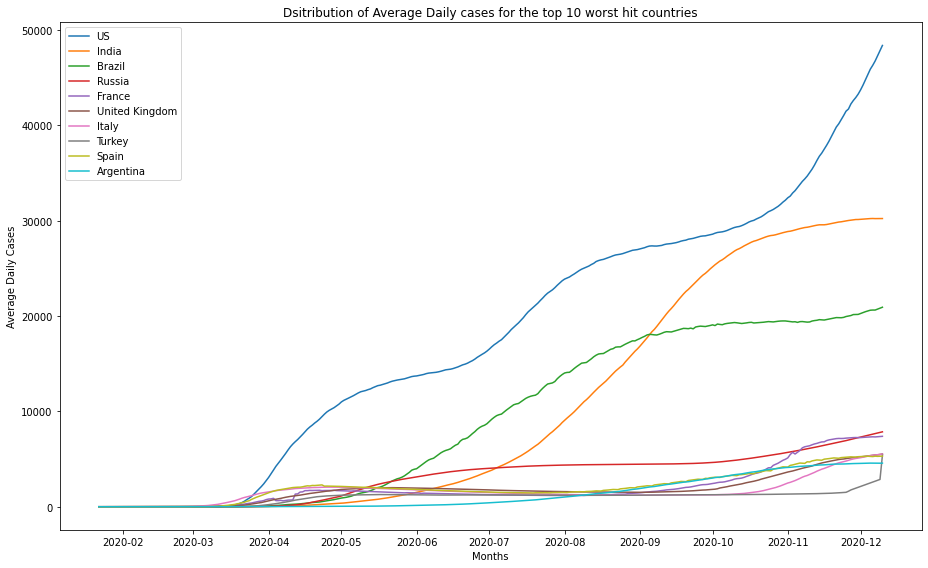

In [18]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(g2)
ax.legend(new_header)
ax.set_xlabel("Months")
ax.set_ylabel("Average Daily Cases")
ax.set_title("Dsitribution of Average Daily cases for the top 10 worst hit countries")
plt.tight_layout()

#### From this graph it can be inferred that US, India and Brazil shows the worst distribtion

#### Also we can see that the distribution for India and Brazil is getting plateaued in October and September respectively

#### But the curve for COVID cases distribution for USA is still steeply increasing

#### So for the rest of our analysis we are only going to focus on USA and its states 

####  We will also study and analyze the measures taken by the government in USA to curb the increase in the number of COVID cases

## 3. Studying the distribution/spread of COVID cases among the stats in USA

In [19]:
# read and describe the data set

USA=pd.read_csv('time_series_covid19_confirmed_US.csv')
USA.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,3043,3087,3117,3186,3233,3258,3300,3329,3426,3510
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,9821,9974,10087,10288,10489,10665,10806,10898,11061,11212
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1224,1240,1245,1258,1264,1269,1272,1275,1292,1296
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1299,1317,1322,1359,1398,1417,1441,1455,1504,1520
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,3324,3426,3496,3600,3663,3744,3776,3803,3881,3950


In [20]:
USA.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
count,3.340000e+03,3340.000000,3330.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,...,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,0.000299,0.000299,0.000599,0.000599,0.001497,...,4494.460778,4560.260778,4626.968263,4694.658383,4764.458683,4830.609880,4887.908683,4945.634731,5005.023054,5079.095808
std,4.315345e+06,36.498055,18638.940791,9.062922,21.718982,0.017303,0.017303,0.024467,0.024467,0.038668,...,15478.537198,15704.264954,15923.063633,16185.387259,16455.457102,16707.208979,16959.466958,17174.105125,17405.724033,17783.887170
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.500000,33.895587,-97.790204,0.000000,0.000000,0.000000,0.000000,0.000000,...,444.000000,452.000000,459.000000,468.500000,476.000000,479.000000,484.000000,489.750000,497.750000,502.750000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,0.000000,0.000000,0.000000,0.000000,0.000000,...,1130.500000,1137.500000,1159.500000,1185.500000,1207.500000,1220.500000,1231.000000,1247.000000,1263.500000,1278.000000
75%,8.404612e+07,840.000000,47130.500000,41.573069,-82.311265,0.000000,0.000000,0.000000,0.000000,0.000000,...,2985.000000,3037.250000,3088.750000,3129.000000,3185.500000,3244.500000,3275.000000,3314.250000,3356.250000,3395.500000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.000000,1.000000,1.000000,1.000000,1.000000,...,457880.000000,466321.000000,475271.000000,487917.000000,501635.000000,512872.000000,525486.000000,532730.000000,543769.000000,566005.000000


### Analyzing the data only till 10th Dec 2020

In [21]:
USA = USA.loc[:,:'12/10/20']

In [22]:
# dropping the unnecessary columns

USA = USA.drop(['UID','iso2','iso3','code3','FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1)
USA

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,2818,2873,2893,2945,2979,3005,3043,3087,3117,3186
1,Alabama,0,0,0,0,0,0,0,0,0,...,9051,9163,9341,9501,9626,9728,9821,9974,10087,10288
2,Alabama,0,0,0,0,0,0,0,0,0,...,1189,1206,1214,1217,1219,1223,1224,1240,1245,1258
3,Alabama,0,0,0,0,0,0,0,0,0,...,1204,1239,1252,1270,1283,1293,1299,1317,1322,1359
4,Alabama,0,0,0,0,0,0,0,0,0,...,3061,3100,3158,3231,3281,3299,3324,3426,3496,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Wyoming,0,0,0,0,0,0,0,0,0,...,1655,1678,1693,1724,1739,1785,1810,1822,1834,1852
3336,Wyoming,0,0,0,0,0,0,0,0,0,...,1089,1121,1149,1175,1187,1198,1221,1237,1250,1271
3337,Wyoming,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3338,Wyoming,0,0,0,0,0,0,0,0,0,...,468,487,497,518,520,546,556,577,586,596


#### Checking for the missing data in the dataset

Text(0.5, 1.0, 'Missing data visualization')

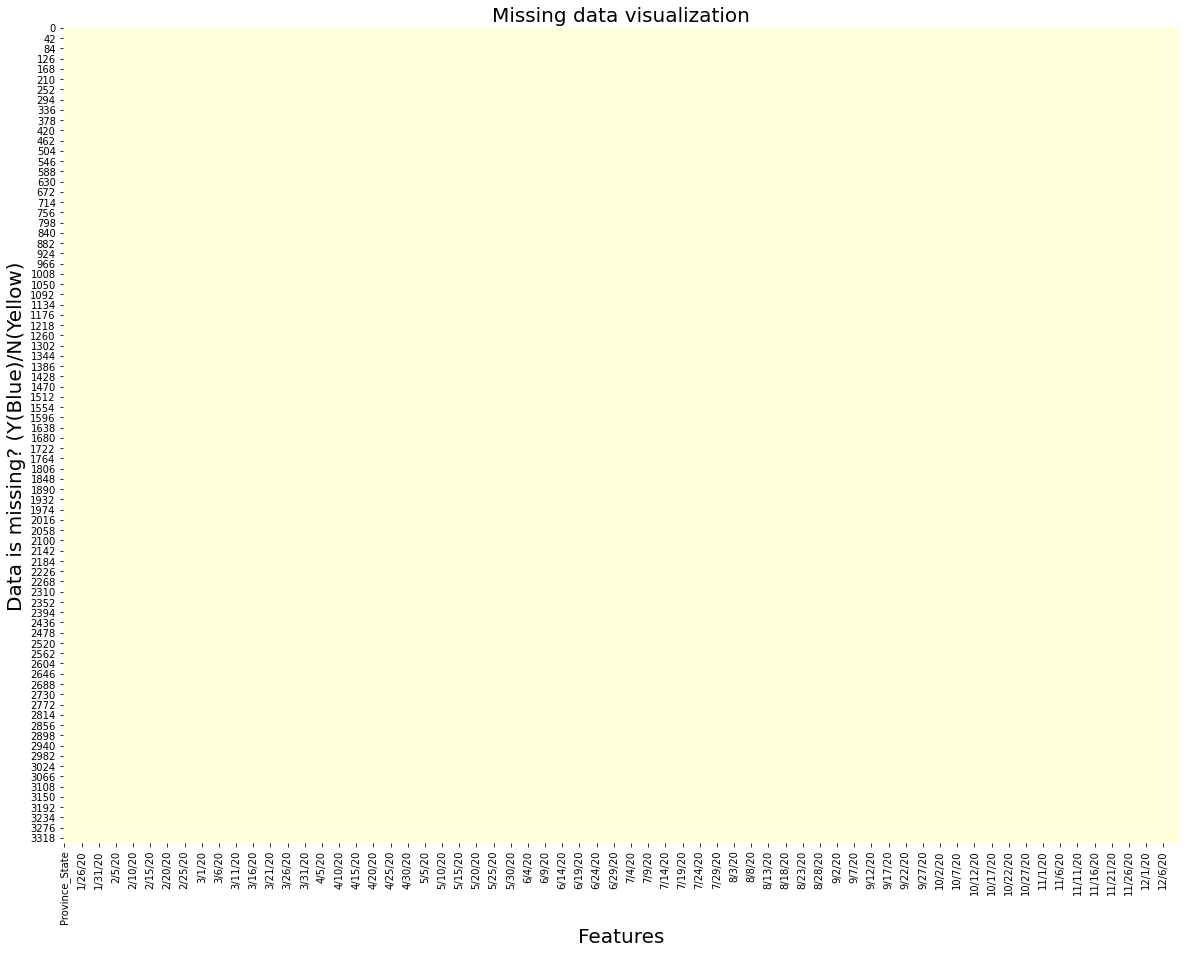

In [23]:
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(USA.isnull(), cmap="YlGnBu", xticklabels = 5,  cbar=False)

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Data is missing? (Y(Blue)/N(Yellow)', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

Text(0.5, 1.0, 'Missing data visualization')

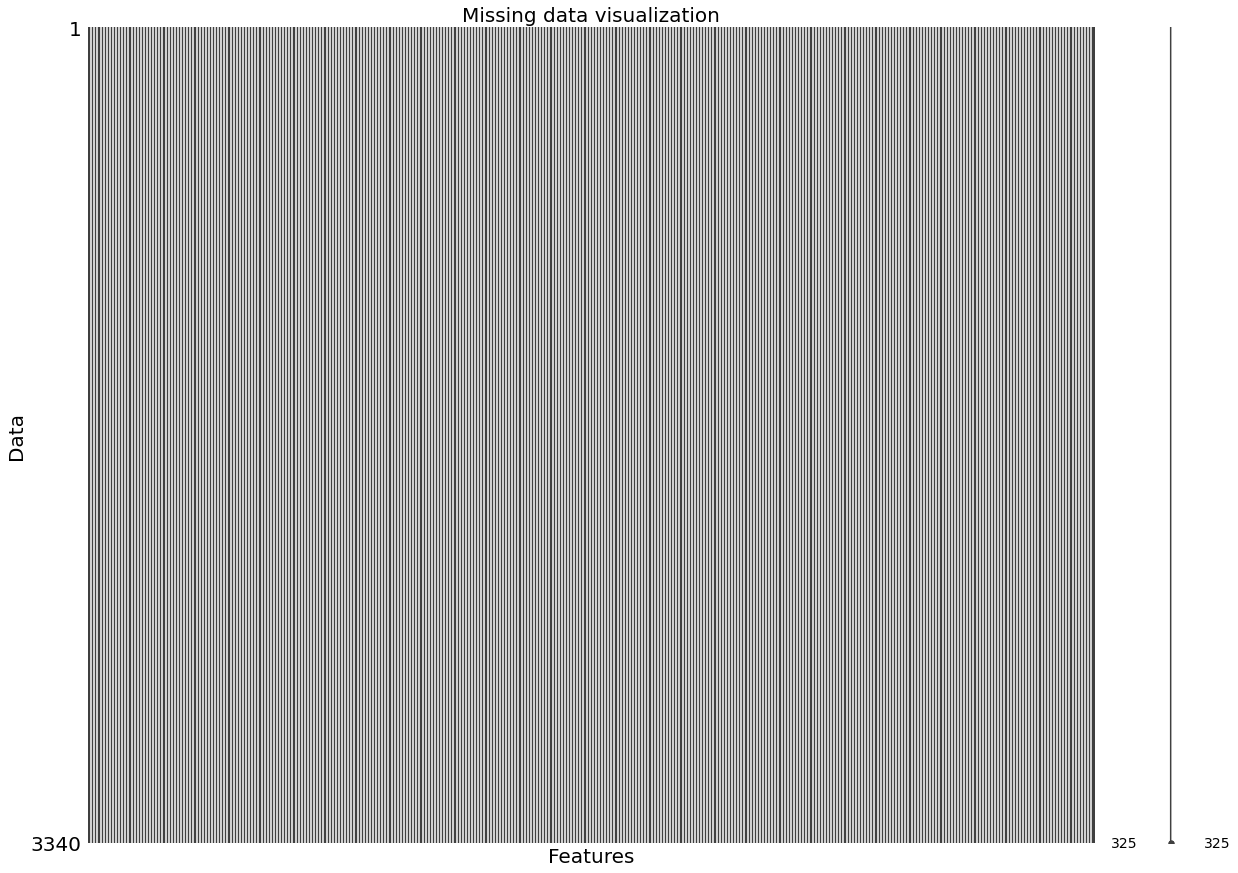

In [24]:
ax = miss_no.matrix(USA,figsize=(20,15))

ax.set_xlabel('Features', Fontsize = 20)
ax.set_ylabel('Data', Fontsize = 20)
ax.set_title('Missing data visualization', Fontsize = 20)

#### From these two plots we can conclude that there is no missing data in our dataset 

### Grouping and sorting the total number of COVID cases in each state within USA

In [25]:
USA3 = USA.groupby('Province_State')['12/10/20'].sum().sort_values(ascending=False).reset_index()
USA3

,Province_State,12/10/20
0,California,1482551
1,Texas,1443353
2,Florida,1094697
3,Illinois,823531
4,New York,743290
5,Ohio,531850
6,Georgia,525402
7,Pennsylvania,462954
8,Wisconsin,456889
9,Michigan,454720


## Plotting the total number of COVID cases (in decreasing order) for the 25 worst affected states in USA

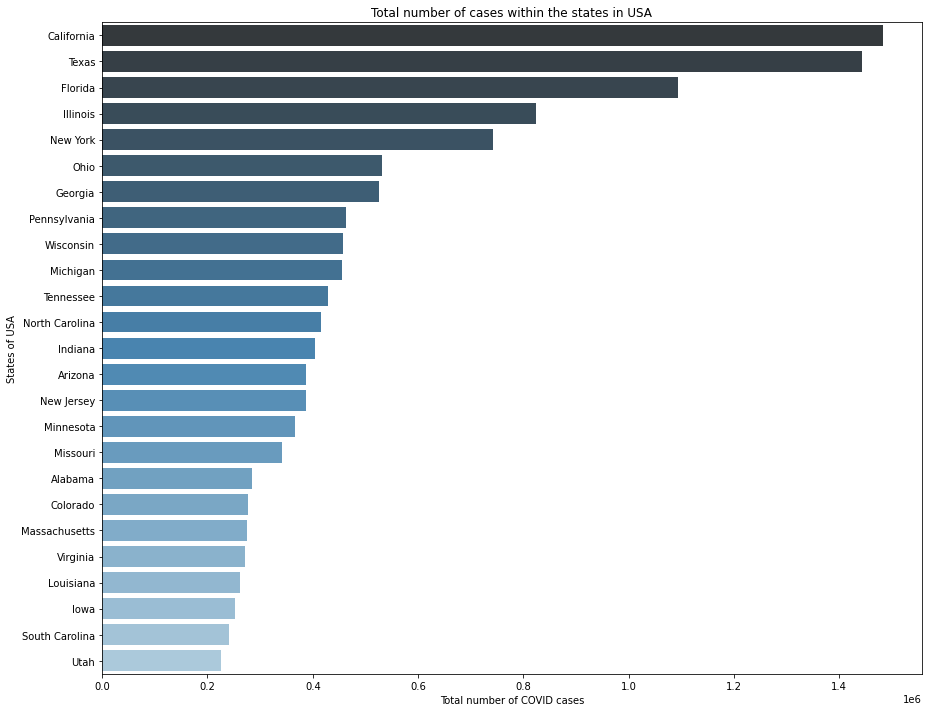

In [26]:
fig, ax = plt.subplots(figsize=(13, 10))
ax = sns.barplot(y='Province_State', x='12/10/20', data=USA3[:25], palette="Blues_d")
ax.set_ylabel("States of USA")
ax.set_xlabel("Total number of COVID cases")
ax.set_title("Total number of cases within the states in USA")
plt.tight_layout()
plt.show()

#### From this bar plot it can be seen that California, Texas, Florida, Illinois and New York are the 5 worst affected states of USA

# Q3. Model selection and fitting to data

### Data pre processing for feeding it into a model

In [27]:
# Converitng the dates in the dataset to DateTime format

USA.columns = USA.columns[:1].tolist() + pd.to_datetime(USA.columns[1:]).tolist()
USA

,Province_State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,Alabama,0,0,0,0,0,0,0,0,0,...,2818,2873,2893,2945,2979,3005,3043,3087,3117,3186
1,Alabama,0,0,0,0,0,0,0,0,0,...,9051,9163,9341,9501,9626,9728,9821,9974,10087,10288
2,Alabama,0,0,0,0,0,0,0,0,0,...,1189,1206,1214,1217,1219,1223,1224,1240,1245,1258
3,Alabama,0,0,0,0,0,0,0,0,0,...,1204,1239,1252,1270,1283,1293,1299,1317,1322,1359
4,Alabama,0,0,0,0,0,0,0,0,0,...,3061,3100,3158,3231,3281,3299,3324,3426,3496,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Wyoming,0,0,0,0,0,0,0,0,0,...,1655,1678,1693,1724,1739,1785,1810,1822,1834,1852
3336,Wyoming,0,0,0,0,0,0,0,0,0,...,1089,1121,1149,1175,1187,1198,1221,1237,1250,1271
3337,Wyoming,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3338,Wyoming,0,0,0,0,0,0,0,0,0,...,468,487,497,518,520,546,556,577,586,596


In [28]:
USA_3 = USA.groupby('Province_State').sum().reset_index()
USA_3

,Province_State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,Alabama,0,0,0,0,0,0,0,0,0,...,252900,256828,260359,264199,267589,269877,272229,276665,280187,284922
1,Alaska,0,0,0,0,0,0,0,0,0,...,33115,33802,34563,35325,36271,37036,37539,38116,38707,39345
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,...,337139,340979,346421,352101,358900,364276,365843,378157,382601,387529
4,Arkansas,0,0,0,0,0,0,0,0,0,...,159309,161521,164310,167137,169382,170924,172042,174325,176652,178854
5,California,0,0,0,0,2,2,2,2,2,...,1246042,1265182,1286550,1310307,1337941,1366673,1390828,1415396,1448987,1482551
6,Colorado,0,0,0,0,0,0,0,0,0,...,237310,241172,247209,252222,257347,260581,264618,268589,272346,276995
7,Connecticut,0,0,0,0,0,0,0,0,0,...,118754,121426,126177,127715,127715,127715,135844,138258,140548,142979
8,Delaware,0,0,0,0,0,0,0,0,0,...,36343,36698,37456,38398,39096,39912,40711,41464,42393,43036
9,Diamond Princess,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


In [29]:
# Get sum of all rows as a new row in Dataframe

total = USA_3.sum()
total.name = 'Total'

# Assign sum of all rows of DataFrame as a new Row

USA_3 = USA_3.append(total.transpose())
USA_3

,Province_State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,Alabama,0,0,0,0,0,0,0,0,0,...,252900,256828,260359,264199,267589,269877,272229,276665,280187,284922
1,Alaska,0,0,0,0,0,0,0,0,0,...,33115,33802,34563,35325,36271,37036,37539,38116,38707,39345
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,...,337139,340979,346421,352101,358900,364276,365843,378157,382601,387529
4,Arkansas,0,0,0,0,0,0,0,0,0,...,159309,161521,164310,167137,169382,170924,172042,174325,176652,178854
5,California,0,0,0,0,2,2,2,2,2,...,1246042,1265182,1286550,1310307,1337941,1366673,1390828,1415396,1448987,1482551
6,Colorado,0,0,0,0,0,0,0,0,0,...,237310,241172,247209,252222,257347,260581,264618,268589,272346,276995
7,Connecticut,0,0,0,0,0,0,0,0,0,...,118754,121426,126177,127715,127715,127715,135844,138258,140548,142979
8,Delaware,0,0,0,0,0,0,0,0,0,...,36343,36698,37456,38398,39096,39912,40711,41464,42393,43036
9,Diamond Princess,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


In [30]:
USA_3.at['Total', 'Province_State'] = 'USA'
USA_3

,Province_State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,Alabama,0,0,0,0,0,0,0,0,0,...,252900,256828,260359,264199,267589,269877,272229,276665,280187,284922
1,Alaska,0,0,0,0,0,0,0,0,0,...,33115,33802,34563,35325,36271,37036,37539,38116,38707,39345
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,...,337139,340979,346421,352101,358900,364276,365843,378157,382601,387529
4,Arkansas,0,0,0,0,0,0,0,0,0,...,159309,161521,164310,167137,169382,170924,172042,174325,176652,178854
5,California,0,0,0,0,2,2,2,2,2,...,1246042,1265182,1286550,1310307,1337941,1366673,1390828,1415396,1448987,1482551
6,Colorado,0,0,0,0,0,0,0,0,0,...,237310,241172,247209,252222,257347,260581,264618,268589,272346,276995
7,Connecticut,0,0,0,0,0,0,0,0,0,...,118754,121426,126177,127715,127715,127715,135844,138258,140548,142979
8,Delaware,0,0,0,0,0,0,0,0,0,...,36343,36698,37456,38398,39096,39912,40711,41464,42393,43036
9,Diamond Princess,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


### Plotiing the total number of cases in USA

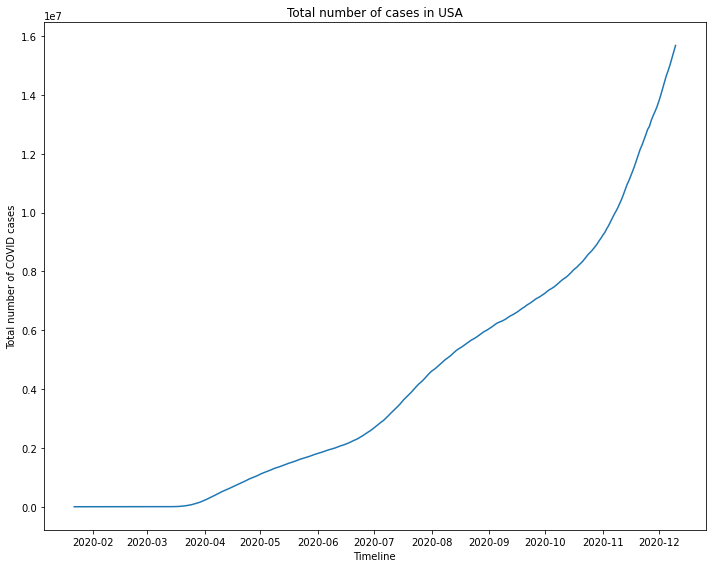

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(USA_3.loc['Total'][1:])
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of COVID cases")
ax.set_title("Total number of cases in USA")
plt.tight_layout()
plt.show()

In [32]:
size = USA_3.shape
size

(59, 325)

In [33]:
USA_daily = USA_3.copy()

### Converting the cumulative number of cases to the daily cases

In [34]:
for i in range(2,size[1]):
    USA_daily.iloc[:,i] = USA_daily.iloc[:,i] - USA_3.iloc[:,i-1]
USA_daily

,Province_State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-01 00:00:00,2020-12-02 00:00:00,2020-12-03 00:00:00,2020-12-04 00:00:00,2020-12-05 00:00:00,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00
0,Alabama,0,0,0,0,0,0,0,0,0,...,3376,3928,3531,3840,3390,2288,2352,4436,3522,4735
1,Alaska,0,0,0,0,0,0,0,0,0,...,539,687,761,762,946,765,503,577,591,638
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,0,0,0,0,...,10322,3840,5442,5680,6799,5376,1567,12314,4444,4928
4,Arkansas,0,0,0,0,0,0,0,0,0,...,1950,2212,2789,2827,2245,1542,1118,2283,2327,2202
5,California,0,0,0,0,2,0,0,0,0,...,15778,19140,21368,23757,27634,28732,24155,24568,33591,33564
6,Colorado,0,0,0,0,0,0,0,0,0,...,4405,3862,6037,5013,5125,3234,4037,3971,3757,4649
7,Connecticut,0,0,0,0,0,0,0,0,0,...,1459,2672,4751,1538,0,0,8129,2414,2290,2431
8,Delaware,0,0,0,0,0,0,0,0,0,...,689,355,758,942,698,816,799,753,929,643
9,Diamond Princess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Taking out the data to work on (the total count of daily cases in USA)

In [35]:
data_series = USA_daily.loc['Total'][1:]
data_series

2020-01-22         1
2020-01-23         0
2020-01-24         1
2020-01-25         0
2020-01-26         3
               ...  
2020-12-06    176327
2020-12-07    192321
2020-12-08    219772
2020-12-09    222803
2020-12-10    226085
Name: Total, Length: 324, dtype: object

### Plotting the total number of daily cases in USA

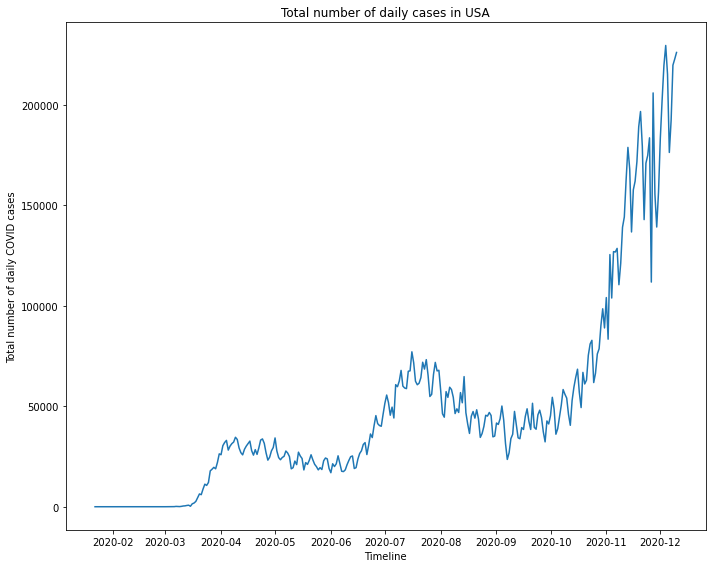

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(data_series)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of daily COVID cases")
ax.set_title("Total number of daily cases in USA")
plt.tight_layout()
plt.show()

## SARIMAX Model

Time series analysis is a great tool for predicting future events such as market values changing. ARIMA and SARIMA are great tools for time series analysis. They require data in a ‘long’ format. By this I mean a collection (preferably a pandas data-frame) of data points where each data point is associated with a time (in pandas this would be a series with different times forming the index). ARIMA stands for auto regressive integrated moving average. SARIMAX is similar and stands for seasonal auto regressive integrated moving average with exogenous factors. In this blog post I will break down how these techniques work as well as an easy way to use them in python. Also I will show how to use AIC (Akaike information criterion) to evaluate models.
To begin I will explain what auto regressive means. In an auto regressive (AR) model the model predicts the next data point by looking at previous data points and using a mathematical formula similar to linear regression. There is something called an order (represented by “p”) that determines how many previous data points will be used. In my opinion the best way to get a good p value is to just try a few different values and see which model came out with the minimum (best) AIC. When the p value is higher the model takes into account more data points that occurred a longer time ago. Below is the formula for an auto regressive model.¹ The “c” is a constant and the “e” stands for error or noise.¹

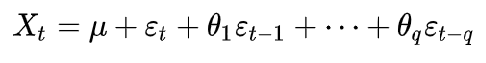

Next up is to explain the integrated part of ARIMA and SARIMAX. For the auto regressive and moving average models to work the data must be stationary. This means the data needs to not have trends or seasonality. Integration is taking a difference of the time-series, subtracting the previous value from each value, which tends to make the data more stationary. There is a value called “d” which represents how many times the data is to be differenced. Like the p value in the auto regressive model, it is best to simply try out a few different values for d and see which model has the minimal AIC.
Now I will explain the moving average part of ARIMA and SARIMAX. A moving average (MA) model performs calculations based on noise in the data along with the data’s slope. The formula for an MA model can be found below.² The “µ” represents the mean of X and the “Θ” represents the parameters of the model.²

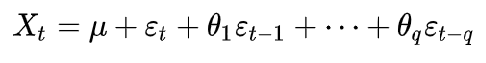

Combining AR and MA along with differencing (I) creates the ARIMA model. There is a value called “q” in the moving average model that is the order. The order is similar to the auto regressive order where it is the amount of past data points to put into the equation.

SARIMAX is used on data sets that have seasonal cycles. The difference between ARIMA and SARIMAX is the seasonality and exogenous factors (seasonality and regular ARIMA don’t mix well). These are a bit complicated, but the key take away is that SARIMAX requires not only the p, d, and q arguments that ARIMA requires, but it also requires another set of p, d, and q arguments for the seasonality aspect as well as an argument called “s” which is the periodicity of the data’s seasonal cycle. When choosing an s value try to get an idea of when the seasonal data cycles. If your data points are separated by a monthly basis and the seasonal cycle is a year, then set s to 12. Or if the data points are separated by a daily basis and the seasonal cycle is a week then make s equal to 7.

For all the values other than SARIMAX’s “s” value I recommend using a grid search this can be used with the itertools library in python. I will start off by explaining what the grid search would resemble for an ARIMA model. Grid searching is essentially running multiple models with different parameters as a way of checking which parameter combination is the best. In python First create a list and a dictionary. The dictionary will store AIC values from the models as keys and have the order of the models as values. The list will simply be a list of AIC values that will be obtained by running the different models. Create three variables named p, d, and q and set them to a range between say 0 and 2. Then use itertools’ product method to find all possible combinations of p’s, d’s, and q’s and set that to a variable. Then use a for loop when calling the ARIMA method to iterate through each combination of p’s, d’s, and q’s. Find the models AIC and append it to the list of AIC’s and update the dictionary with each models AIC and the set of parameters used. Finally find the minimum value in the list of AICs and then find that key in the dictionary. The resulting key will be the optimal order to create a model with.
To run an ARIMA model there are two arguments: the actual data and the order. The order is a tuple containing p, d, and q. To run the model simply create an ARIMA object instance from the class in statsmodels.tsa.arima_model. Set the arguments (data and order) upon instantiating and then fit the model by calling “.fit()” do this for every combination of arguments and save the AIC in the lists and dictionaries mentioned above. To find the model’s AIC simply take the instance variable of the model and call “.aic” to return the AIC. 

SARIMAX is much like ARIMA, but a little more complicated. Not only do you have to use a loop and grid search for the optimal values of p, d, and q, but you have to also use a nested loop and grid search for the seasonal values for p, d, and q. There are also many more parameters in the SARIMAX function.

Source: https://medium.com/swlh/a-brief-introduction-to-arima-and-sarima-modeling-in-python-87a58d375def

### Calculating and plotting the first difference of the data to make it stationary

In [37]:
first_difference = data_series.diff().dropna()

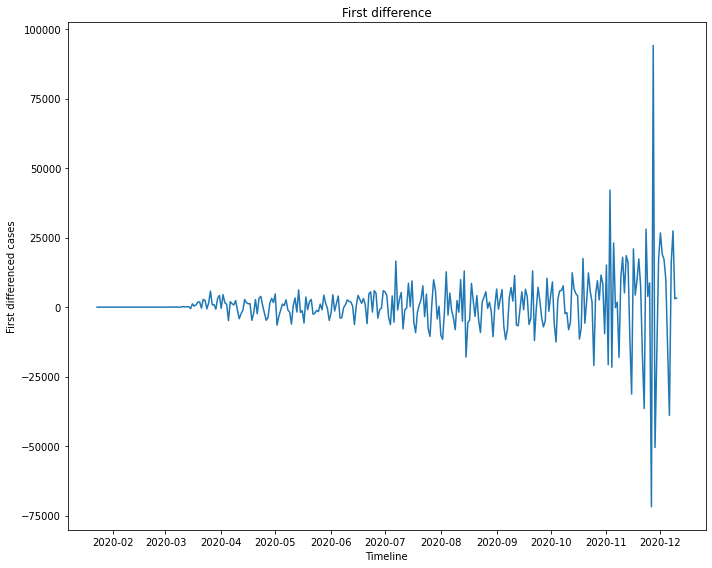

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(first_difference)
ax.set_xlabel("Timeline")
ax.set_ylabel("First differenced cases")
ax.set_title("First difference")
plt.tight_layout()
plt.show()

## Augmented Dickey Fuller Test (ADF Test)

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

In ARIMA time series forecasting, the first step is to determine the number of differencing required to make the series stationary.

Since testing the stationarity of a time series is a frequently performed activity in autoregressive models, the ADF test along with KPSS test is something that you need to be fluent in when performing time series analysis.

Another point to remember is the ADF test is fundamentally a statistical significance test. That means, there is a hypothesis testing involved with a null and alternate hypothesis and as a result a test statistic is computed and p-values get reported.

It is from the test statistic and the p-value, you can make an inference as to whether a given series is stationary or not.

The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the stationarity of a time series.

Unit root is a characteristic of a time series that makes it non-stationary. Technically speaking, a unit root is said to exist in a time series of the value of alpha = 1 in the below equation.

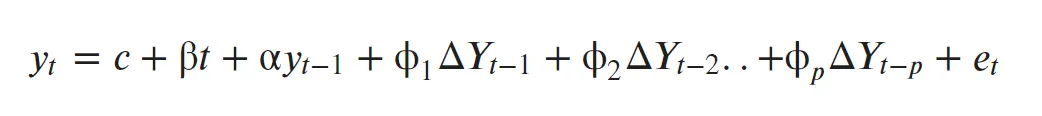

where, Yt is the value of the time series at time ‘t’ and Xe is an exogenous variable (a separate explanatory variable, which is also a time series).

The presence of a unit root means the time series is non-stationary. Besides, the number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary.

Before going into ADF test, let’s first understand what is the Dickey-Fuller test.

A Dickey-Fuller test is a unit root test that tests the mull hypothesis that α=1 in the following model equation. alpha is the coefficient of the first lag on Y.

Null Hypothesis (H0): alpha=1

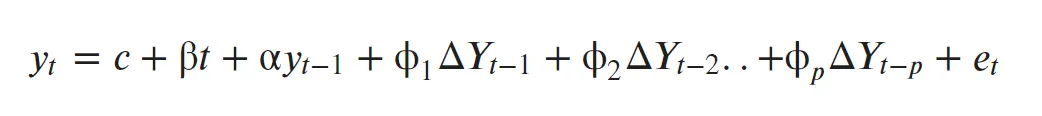

where,

y(t-1) = lag 1 of time series
delta Y(t-1) = first difference of the series at time (t-1)
Fundamentally, it has a similar null hypothesis as the unit root test. That is, the coefficient of Y(t-1) is 1, implying the presence of a unit root. If not rejected, the series is taken to be non-stationary.

The Augmented Dickey-Fuller test evolved based on the above equation and is one of the most common form of Unit Root test.

As the name suggest, the ADF test is an ‘augmented’ version of the Dickey Fuller test.

The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model.

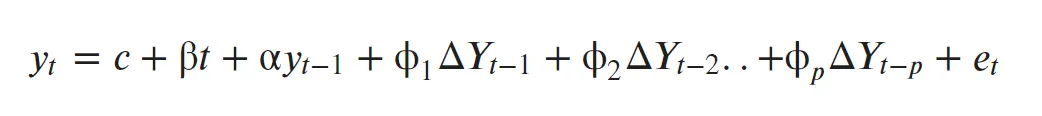

If you notice, we have only added more differencing terms, while the rest of the equation remains the same. This adds more thoroughness to the test.

The null hypothesis however is still the same as the Dickey Fuller test.

A key point to remember here is: Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

However, this is a very common mistake analysts commit with this test. That is, if the p-value is less than significance level, people mistakenly take the series to be non-stationary.

The statsmodel package provides a reliable implementation of the ADF test via the adfuller() function in statsmodels.tsa.stattools. It returns the following outputs:

The p-value

The value of the test statistic

Number of lags considered for the test

The critical value cutoffs.

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

Source: https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

### Running the adfuller test on the first difference

In [39]:
result = adfuller(first_difference)
print(str(result) + '\n')
print(f'ADF Statistic: {result[0]}' + '\n')
print(f'n_lags: {result[2]}' + '\n')
print(f'p-value: {result[1]}' + '\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}' + '\n')    

(-2.1342060205946014, 0.23098442613600434, 14, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, 6367.036094890895)

ADF Statistic: -2.1342060205946014

n_lags: 14

p-value: 0.23098442613600434

Critial Values:
   1%, -3.45176116018037

Critial Values:
   5%, -2.870970093607691

Critial Values:
   10%, -2.571794416006072



#### Since the p-value is not less than 0.05 

#### Therefore, we cannot reject the null hypothesis that the data in not stationary

## Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots

Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting.

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

#### Intuition for ACF and PACF Plots
Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story.

We can use the intuition for ACF and PACF above to explore some thought experiments.

#### Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

#### Moving Average Intuition
Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

Source: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

In [40]:
a = first_difference.astype(float)
a.describe()

count      323.000000
mean       699.950464
std      10863.438102
min     -71798.000000
25%      -1812.000000
50%         16.000000
75%       3877.500000
max      94143.000000
Name: Total, dtype: float64

### Plotting the ACF and PACF for the first difference

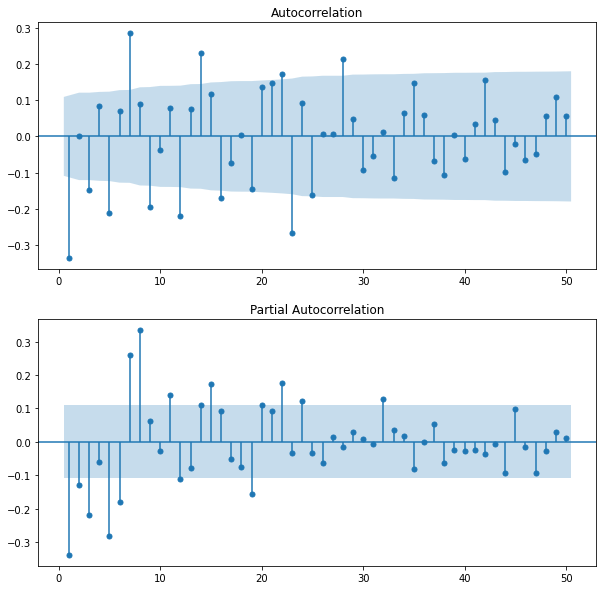

In [41]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10))

plot_acf(a,lags=50,zero=False,ax=ax1)
plot_pacf(a,lags=50,zero=False,ax=ax2)

plt.show()

### Calculating and plotting the second difference of the data to make it stationary

In [42]:
second_difference = data_series.diff().diff().dropna()

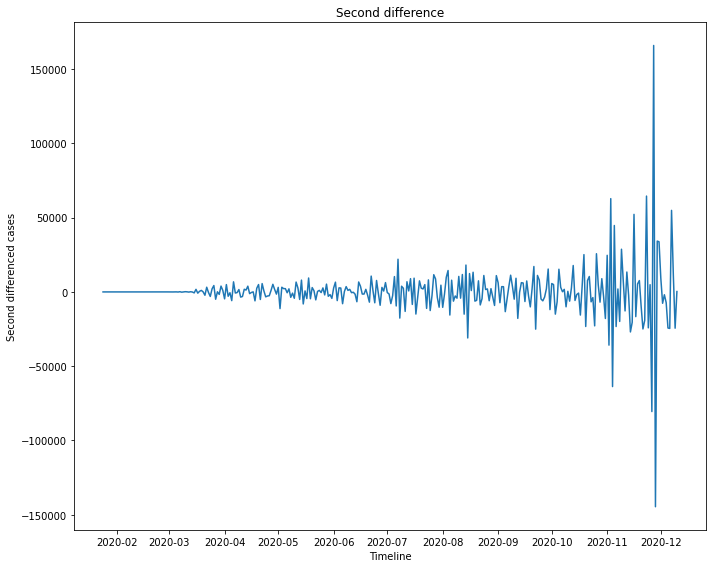

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(second_difference)
ax.set_xlabel("Timeline")
ax.set_ylabel("Second differenced cases")
ax.set_title("Second difference")
plt.tight_layout()
plt.show()

### Running the adfuller test on the second difference

In [44]:
result = adfuller(second_difference)
print(str(result) + '\n')
print(f'ADF Statistic: {result[0]}' + '\n')
print(f'n_lags: {result[2]}' + '\n')
print(f'p-value: {result[1]}' + '\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}' + '\n')    

(-4.600428064482021, 0.00012893517741288682, 17, 304, {'1%': -3.452045317832011, '5%': -2.871094805558846, '10%': -2.571860921485457}, 6341.9621656309755)

ADF Statistic: -4.600428064482021

n_lags: 17

p-value: 0.00012893517741288682

Critial Values:
   1%, -3.452045317832011

Critial Values:
   5%, -2.871094805558846

Critial Values:
   10%, -2.571860921485457



#### Since the p-value is less than 0.05 

#### Therefore, we can reject the null hypothesis that the data in not stationary

In [45]:
b = second_difference.astype(float)
b.describe()

count       322.000000
mean         10.195652
std       17785.792742
min     -144630.000000
25%       -4202.000000
50%           1.000000
75%        3679.500000
max      165941.000000
Name: Total, dtype: float64

### Plotting the ACF and PACF for the second difference

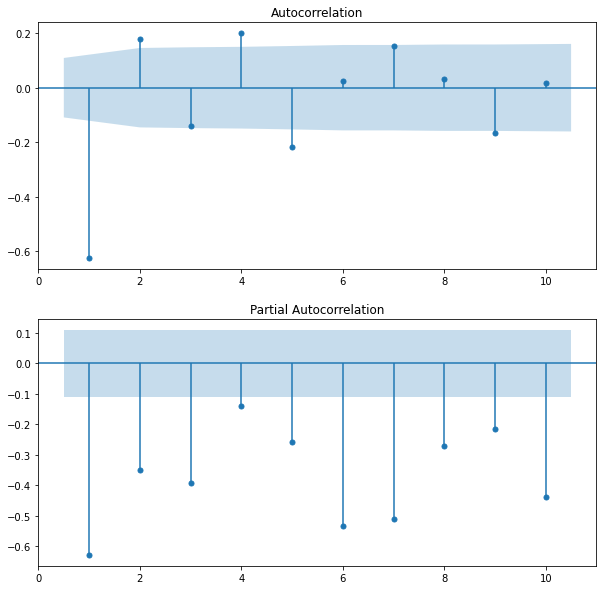

In [46]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10))

plot_acf(b,lags=10,zero=False,ax=ax1)
plot_pacf(b,lags=10,zero=False,ax=ax2)

plt.show()

#### This type of ACF and PACF plot indicates that we have over differenced the data

#### So we will difference the data only once

In [47]:
s = data_series.astype(float)
s.describe()

count       324.000000
mean      48395.552469
std       50065.958004
min           0.000000
25%       19861.250000
50%       34684.500000
75%       58445.750000
max      229573.000000
Name: Total, dtype: float64

#### We will apply other techniques to make the data stationary

### Taking the square root of the dataset and analysing it

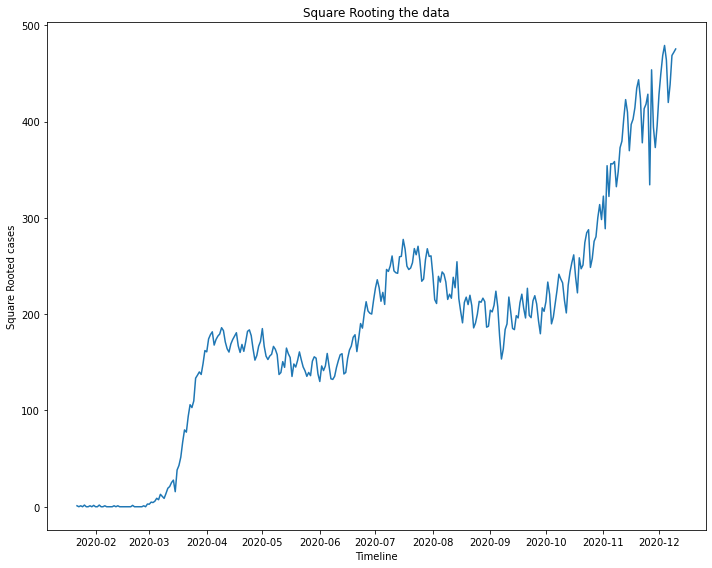

In [48]:
sr = np.sqrt(s)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(sr)
ax.set_xlabel("Timeline")
ax.set_ylabel("Square Rooted cases")
ax.set_title("Square Rooting the data")
plt.tight_layout()
plt.show()

### Running the adfuller test on the square rooted data

In [49]:
result = adfuller(sr)
print(str(result) + '\n')
print(f'ADF Statistic: {result[0]}' + '\n')
print(f'n_lags: {result[2]}' + '\n')
print(f'p-value: {result[1]}' + '\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}' + '\n')   

(-0.5990447984373971, 0.871197717243136, 15, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, 2455.8956035649308)

ADF Statistic: -0.5990447984373971

n_lags: 15

p-value: 0.871197717243136

Critial Values:
   1%, -3.45176116018037

Critial Values:
   5%, -2.870970093607691

Critial Values:
   10%, -2.571794416006072



#### Since the p-value is not less than 0.05 

#### Therefore, we cannot reject the null hypothesis that the data in not stationary

### Plotting the ACF and PACF for the square rooted data

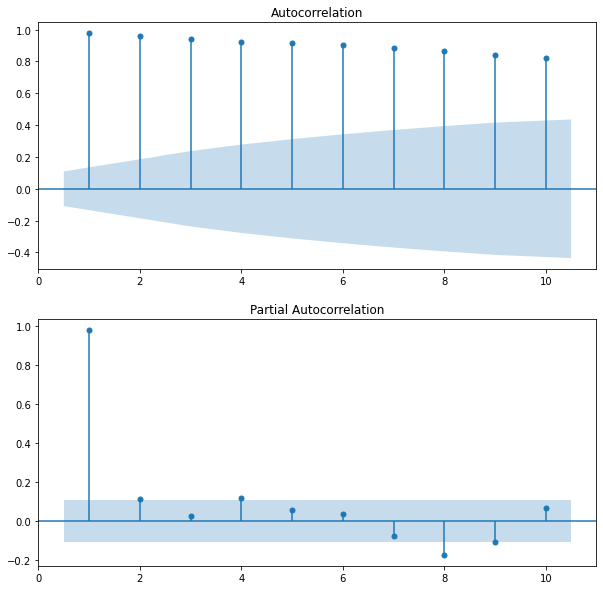

In [50]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10))

plot_acf(sr,lags=10,zero=False,ax=ax1)
plot_pacf(sr,lags=10,zero=False,ax=ax2)

plt.show()

#### This type of ACF and PACF plot indicates that the data is not stationary

#### So we will not use this technique of making the data stationary

### Decreasing the volatility of the dataset and analysing it

In [51]:
vol_dec = s.copy()
m = 7
for i in range(0,len(s),m):
    vol_dec[i:i+m] = (vol_dec[i:i+m]) / (s[i:i+m].std())

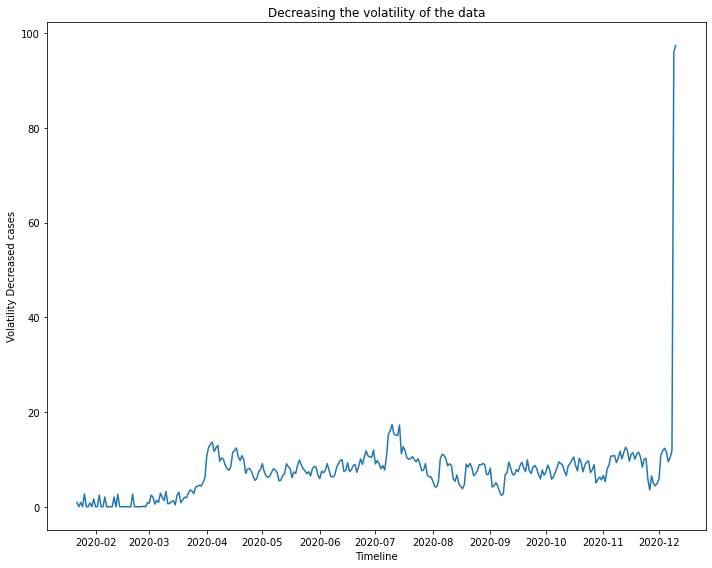

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(vol_dec)
ax.set_xlabel("Timeline")
ax.set_ylabel("Volatility Decreased cases")
ax.set_title("Decreasing the volatility of the data")
plt.tight_layout()
plt.show()

### Running the adfuller test on the volatility decreased data

In [53]:
result = adfuller(vol_dec)
print(str(result) + '\n')
print(f'ADF Statistic: {result[0]}' + '\n')
print(f'n_lags: {result[2]}' + '\n')
print(f'p-value: {result[1]}' + '\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}' + '\n')   

(0.2682402448337439, 0.9758395163924252, 0, 323, {'1%': -3.4507587628808922, '5%': -2.870530068560499, '10%': -2.5715597727381647}, 1860.040452270258)

ADF Statistic: 0.2682402448337439

n_lags: 0

p-value: 0.9758395163924252

Critial Values:
   1%, -3.4507587628808922

Critial Values:
   5%, -2.870530068560499

Critial Values:
   10%, -2.5715597727381647



#### Since the p-value is not less than 0.05 

#### Therefore, we cannot reject the null hypothesis that the data in not stationary

### Plotting the ACF and PACF for the volatility decreased data

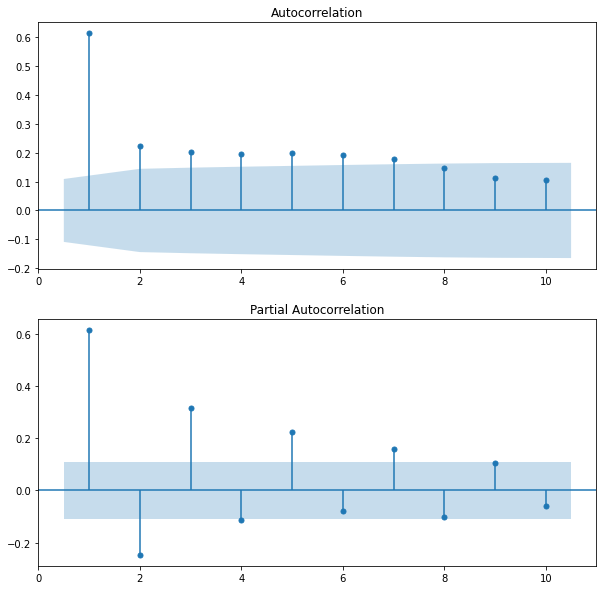

In [54]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10))

plot_acf(vol_dec,lags=10,zero=False,ax=ax1)
plot_pacf(vol_dec,lags=10,zero=False,ax=ax2)

plt.show()

#### The ACF plot is cutting after 7th lag and PACF is tailing off

#### This means the MA (7) model is the best fit

### To keep our model and analysis simple and robust we are going to use the technique of differencing only

### The differencing technique is inbuilt in the SARIMAX model as well

### We are going to use first differencing only (as derived from the analysis done above)

## AIC and BIC

AIC and BIC are widely used in model selection criteria. AIC means Akaike’s Information Criteria and BIC means Bayesian Information Criteria. Though these two terms address model selection, they are not the same. One can come across may difference between the two approaches of model selection.

Akaike’s Information Criteria was formed in 1973 and Bayesian Information Criteria in 1978. Hirotsugu Akaike developed Akaike’s Information Criteria whereas Gideon E. Schwarz developed Bayesian information criterion.

The AIC can be termed as a mesaure of the goodness of fit of any estimated statistical model. The BIC is a type of model selection among a class of parametric models with different numbers of parameters.

When comparing the Bayesian Information Criteria and the Akaike’s Information Criteria, penalty for additional parameters is more in BIC than AIC. Unlike the AIC, the BIC penalizes free parameters more strongly.

Akaike’s Information Criteria generally tries to find unknown model that has high dimensional reality. This means the models are not true models in AIC. On the other hand, the Bayesian Information Criteria comes across only True models. It can also be said that Bayesian Information Criteria is consistent whereas Akaike’s Information Criteria is not so.

When Akaike’s Information Criteria will present the danger that it would outfit. the Bayesian Information Criteria will present the danger that it would underfit. Though BIC is more tolerant when compared to AIC, it shows less tolerance at higher numbers.

Akaike’s Information Criteria is good for making asymptotically equivalent to cross-validation. On the contrary, the Bayesian Information Criteria is good for consistent estimation.

Summary

1. AIC means Akaike’s Information Criteria and BIC means Bayesian Information Criteria.

2. Akaike’s Information Criteria was formed in 1973 and Bayesian Information Criteria in 1978.

3. When comparing the Bayesian Information Criteria and the Akaike’s Information Criteria, penalty for additional parameters is more in BIC than AIC.

4. Akaike’s Information Criteria generally tries to find unknown model that has high dimensional reality. On the other hand, the Bayesian Information Criteria comes across only True models.

5. Bayesian Information Criteria is consistent whereas Akaike’s Information Criteria is not so.

6. Akaike’s Information Criteria is good for making asymptotically equivalent to cross-validation. On the contrary, the Bayesian Information Criteria is good for consistent estimation.

7. Though BIC is more tolerant when compared to AIC, it shows less tolerance at higher numbers.

8. Unlike the AIC, the BIC penalizes free parameters more strongly.

Source: http://www.differencebetween.net/miscellaneous/difference-between-aic-and-bic/#:~:text=AIC%20vs%20BIC,two%20approaches%20of%20model%20selection.

### Searching for the best model with the help of AIC and BIC

In [55]:
order_aic_bic=[]
for p in range(11):
    for q in range(11):
        try:
            model=SARIMAX(s, order=(p,1,q))
            results=model.fit()
            order_aic_bic.append((p,q,results.aic,results.bic))
        except:
            order_aic_bic.append((p,q,None,None))
order_df = pd.DataFrame(order_aic_bic,columns=['p','q','aic','bic'])
print(order_df.sort_values('aic'))
print(order_df.sort_values('bic'))

      p  q          aic          bic
86    7  9  6713.738621  6777.958711
118  10  8  6714.306965  6786.082359
108   9  9  6714.675524  6786.450918
107   9  8  6715.558178  6783.555920
106   9  7  6716.195753  6780.415843
..   .. ..          ...          ...
1     0  1  6872.879831  6880.435136
44    4  0  6873.068470  6891.956732
22    2  0  6884.373855  6895.706812
11    1  0  6886.943092  6894.498397
0     0  0  6922.356727  6926.134379

[121 rows x 4 columns]
    p  q          aic          bic
60  5  5  6734.669131  6776.223307
70  6  4  6735.165864  6776.720039
84  7  7  6720.249039  6776.913824
86  7  9  6713.738621  6777.958711
92  8  4  6729.432208  6778.541688
.. .. ..          ...          ...
45  4  1  6869.722155  6892.388069
11  1  0  6886.943092  6894.498397
22  2  0  6884.373855  6895.706812
46  4  2  6871.265411  6897.708977
0   0  0  6922.356727  6926.134379

[121 rows x 4 columns]


### From the above search it can be infered that the best model is ARIMA (5,1,5)

In [56]:
model1 = SARIMAX(s,order=(5,1,5))
res=model1.fit()
pre = res.get_prediction(start=-324)
me = pre.predicted_mean
ci = pre.conf_int()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                  Total   No. Observations:                  324
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -3356.335
Date:                Sat, 19 Dec 2020   AIC                           6734.669
Time:                        12:16:40   BIC                           6776.223
Sample:                    01-22-2020   HQIC                          6751.257
                         - 12-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2443      0.092      2.661      0.008       0.064       0.424
ar.L2         -0.9877      0.076    -12.991      0.000      -1.137      -0.839
ar.L3         -0.0228      0.124     -0.184      0.8

#### Plotting the model diagnostics

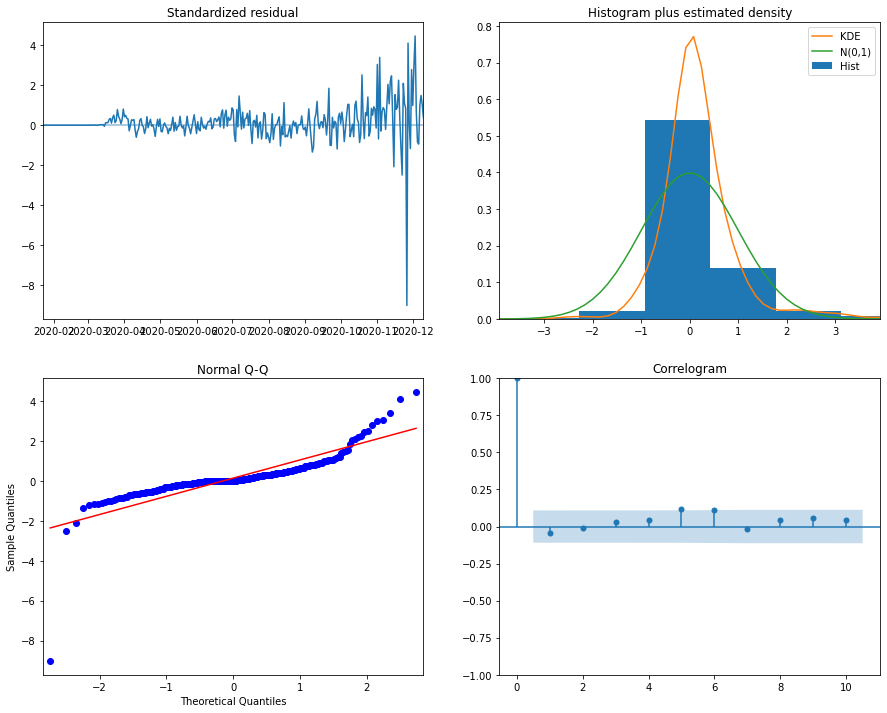

In [57]:
res.plot_diagnostics(figsize=(15,12))
plt.show()

### Plotting the predicted and actual daily COVID cases

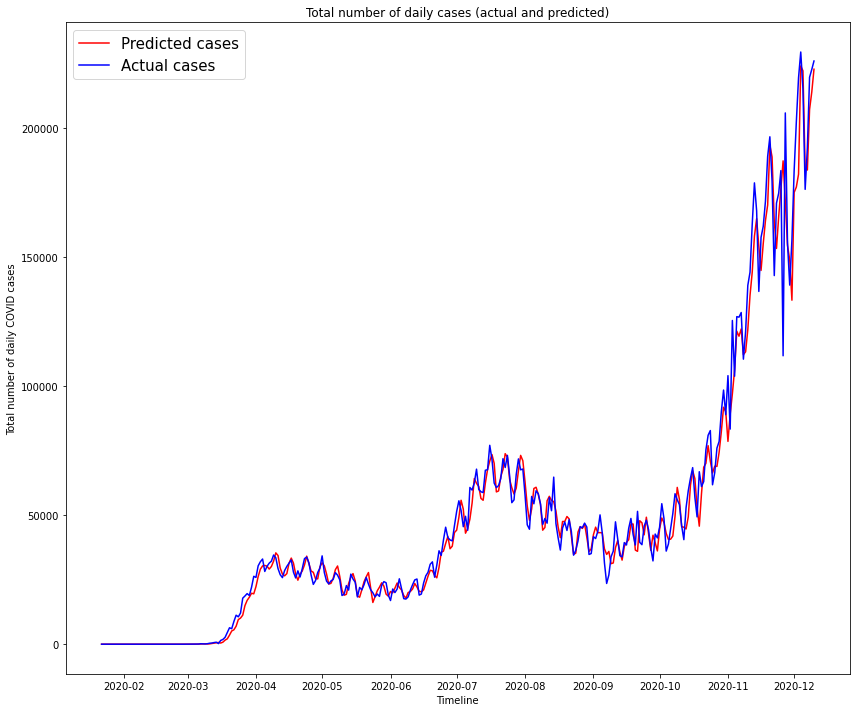

In [58]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(me.index, me.values,color='red')
ax.plot(s,color='blue')
ax.legend(['Predicted cases','Actual cases'],fontsize=15)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of daily COVID cases")
ax.set_title("Total number of daily cases (actual and predicted)")
plt.tight_layout()
plt.show()

In [59]:
s_con = s.cumsum()
me_con = me.cumsum()

### Plotting the predicted and actual cumulative COVID cases

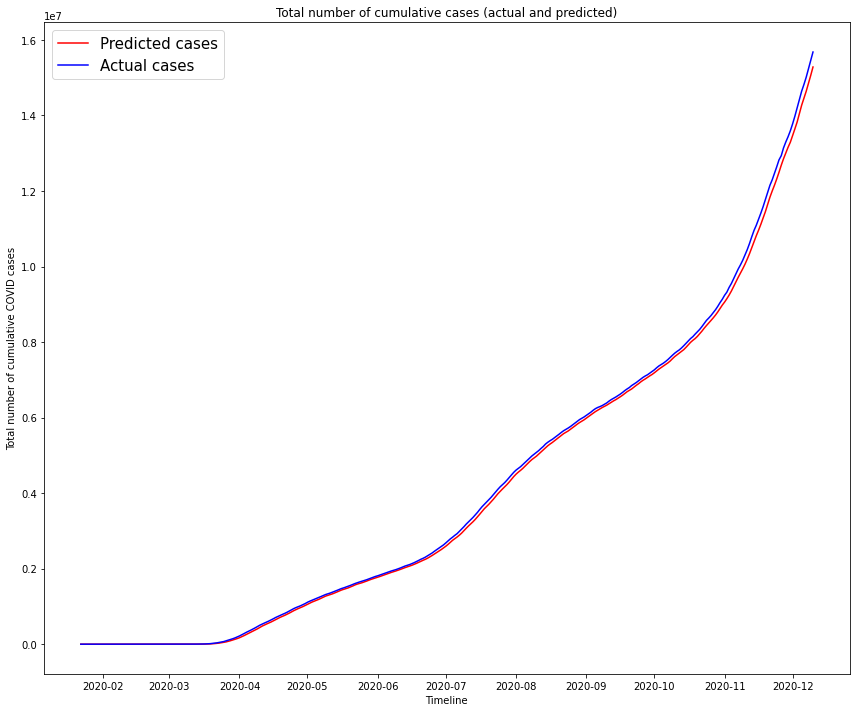

In [60]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(me_con.index, me_con.values,color='red')
ax.plot(s_con,color='blue')
ax.legend(['Predicted cases','Actual cases'],fontsize=15)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of cumulative COVID cases")
ax.set_title("Total number of cumulative cases (actual and predicted)")
plt.tight_layout()
plt.show()

### The forecasting is done on 4 cases 

### 1. The whole data is fed to the model and then the forecast is done

### 2. The average case is forecasted by feeding the data which is neither showing the best trend nor the worst trend

### 3. The worst case is forecasted by feeding the data which is showing the worst trend

### 4. The best case is forecasted by feeding the data which is showing the best trend

## Case 1 (The whole data is fed to the model and then the forecast is done)

In [61]:
pre_f = res.get_forecast(steps=100)
me_f = pre_f.predicted_mean
ci_f = pre_f.conf_int()

### Plotting the predicted cases, actual daily COVID cases and the forecasted cases for next 100 days

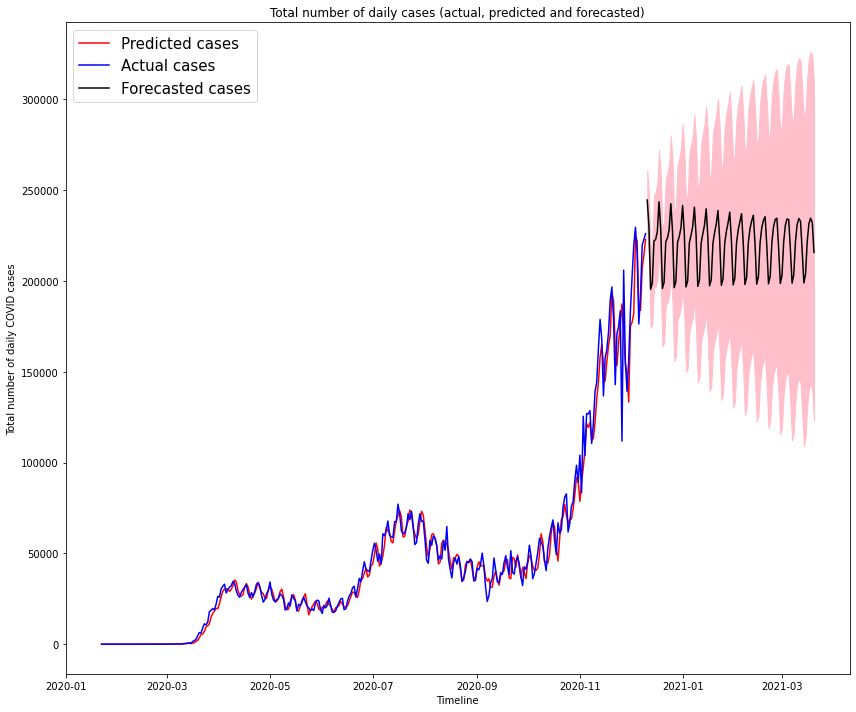

In [62]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(me.index, me.values,color='red')
ax.plot(s,color='blue')
ax.plot(me_f.index, me_f.values, color='black')
ax.fill_between(ci_f.index, ci_f['lower Total'], ci_f['upper Total'], color='pink')
ax.legend(['Predicted cases','Actual cases', 'Forecasted cases'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of daily COVID cases")
ax.set_title("Total number of daily cases (actual, predicted and forecasted)")
plt.tight_layout()
plt.show()

In [63]:
s_con = s.cumsum()
me_f_con = me_f.cumsum()
ci_f_con = ci_f.cumsum()

n_me_f_con = me_f_con.add(me_con[-1])
n_ci_f_con = ci_f_con.add(me_con[-1])

### Plotting the predicted cases, actual cumulative COVID cases and the forecasted cases for next 100 days

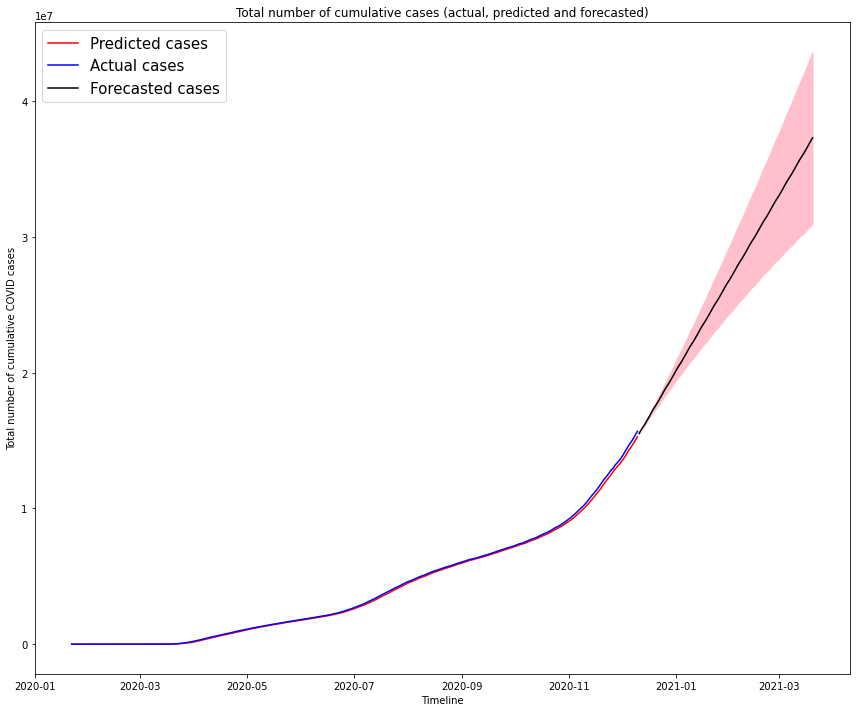

In [64]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(me_con.index, me_con.values,color='red')
ax.plot(s_con,color='blue')
ax.plot(n_me_f_con.index, n_me_f_con.values, color='black')
ax.fill_between(n_ci_f_con.index, n_ci_f_con['lower Total'], n_ci_f_con['upper Total'], color='pink')
ax.legend(['Predicted cases','Actual cases', 'Forecasted cases'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of cumulative COVID cases")
ax.set_title("Total number of cumulative cases (actual, predicted and forecasted)")
plt.tight_layout()
plt.show()

## Case 2 (The average case is forecasted by feeding the data which is neither showing the best trend nor the worst trend)

In [65]:
td_i = int(round(len(s)*0.15,0))
td_l = int(round(len(s)*0.90,0))
train_a = s[td_i:td_l]

In [66]:
model1 = SARIMAX(train_a,order=(5,1,5))
res_a=model1.fit()
pre_a = res_a.get_prediction(start=-241)
pre_a_f = res_a.get_forecast(steps=150)
me_a = pre_a.predicted_mean
me_a_f = pre_a_f.predicted_mean
ci_a = pre_a.conf_int()
ci_a_f = pre_a_f.conf_int()
print(res_a.summary())

                           Statespace Model Results                           
Dep. Variable:                  Total   No. Observations:                  243
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2409.601
Date:                Sat, 19 Dec 2020   AIC                           4841.202
Time:                        12:16:47   BIC                           4879.580
Sample:                    03-11-2020   HQIC                          4856.662
                         - 11-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6872      0.232      2.961      0.003       0.232       1.142
ar.L2         -0.0913      0.271     -0.337      0.736      -0.622       0.440
ar.L3         -1.0038      0.185     -5.415      0.0

#### Plotting the model diagnostics

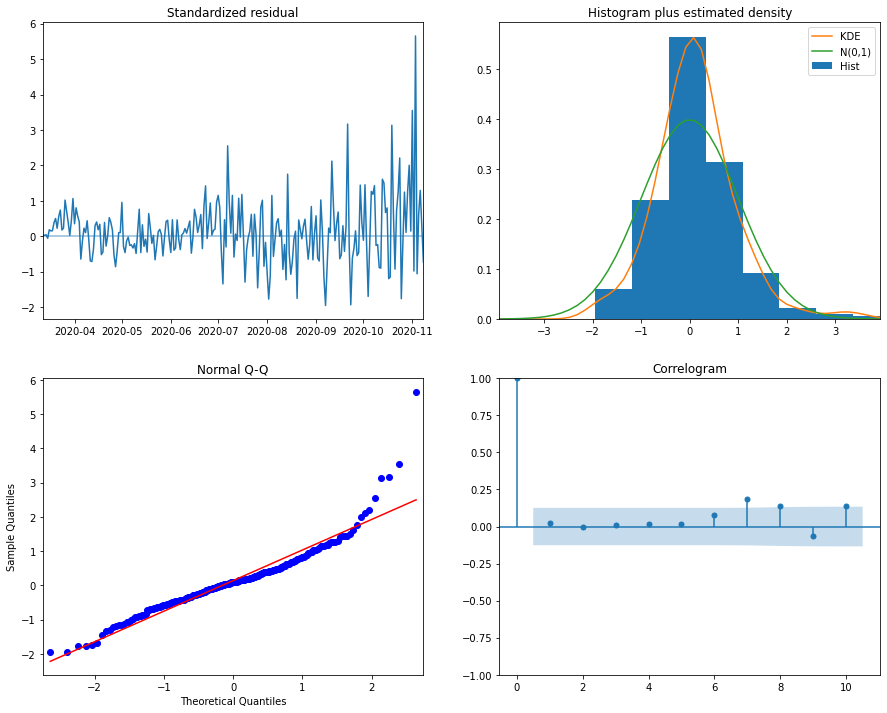

In [67]:
res_a.plot_diagnostics(figsize=(15,12))
plt.show()

In [68]:
pre_a_f = res_a.get_forecast(steps=100)
me_a_f = pre_a_f.predicted_mean
ci_a_f = pre_a_f.conf_int()

### Plotting the predicted cases, actual daily COVID cases and the forecasted cases for next 100 days

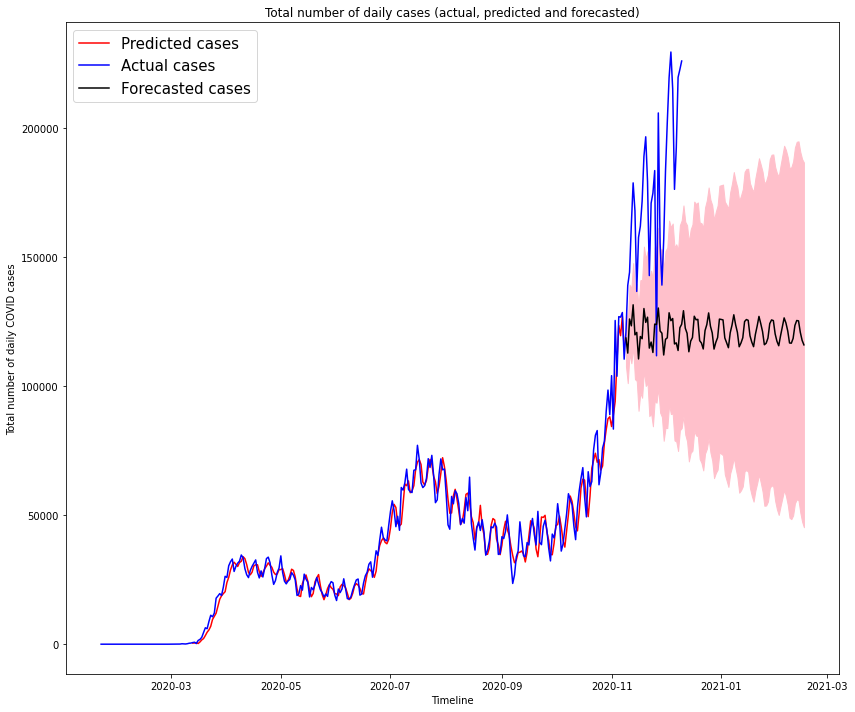

In [69]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(me_a.index, me_a.values,color='red')
ax.plot(s,color='blue')
ax.plot(me_a_f.index, me_a_f.values, color='black')
ax.fill_between(ci_a_f.index, ci_a_f['lower Total'], ci_a_f['upper Total'], color='pink')
ax.legend(['Predicted cases','Actual cases', 'Forecasted cases'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of daily COVID cases")
ax.set_title("Total number of daily cases (actual, predicted and forecasted)")
plt.tight_layout()
plt.show()

In [70]:
s_con = s.cumsum()
me_a_con = me_a.cumsum()
ci_a_con = ci_a.cumsum()

me_a_f_con = me_a_f.cumsum()
ci_a_f_con = ci_a_f.cumsum()

n_me_a_f_con = me_a_f_con.add(me_a_con[-1])
n_ci_a_f_con = ci_a_f_con.add(me_a_con[-1])

### Plotting the predicted cases, actual cumulative COVID cases and the forecasted cases for next 100 days

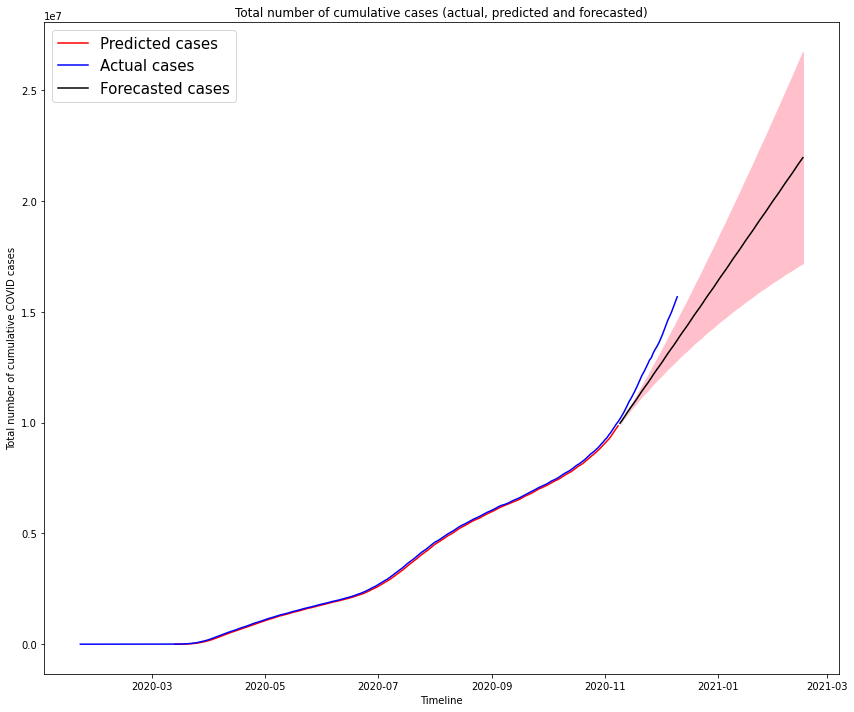

In [71]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(me_a_con.index, me_a_con.values,color='red')
ax.plot(s_con,color='blue')
ax.plot(n_me_a_f_con.index, n_me_a_f_con.values, color='black')
ax.fill_between(n_ci_a_f_con.index, n_ci_a_f_con['lower Total'], n_ci_a_f_con['upper Total'], color='pink')
ax.legend(['Predicted cases','Actual cases', 'Forecasted cases'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of cumulative COVID cases")
ax.set_title("Total number of cumulative cases (actual, predicted and forecasted)")
plt.tight_layout()
plt.show()

### Case 3 (The worst case is forecasted by feeding the data which is showing the worst trend)

In [72]:
td_i = int(round(len(s)*0.75,0))
td_l = int(round(len(s)*1.0,0))
train_w = s[td_i:td_l]

In [73]:
model1 = SARIMAX(train_w,order=(5,1,5))
res_w=model1.fit()
pre_w = res_w.get_prediction(start=-79)
pre_w_f = res_w.get_forecast(steps=150)
me_w = pre_w.predicted_mean
me_w_f = pre_w_f.predicted_mean
ci_w = pre_w.conf_int()
ci_w_f = pre_w_f.conf_int()
print(res_w.summary())

                           Statespace Model Results                           
Dep. Variable:                  Total   No. Observations:                   81
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -885.302
Date:                Sat, 19 Dec 2020   AIC                           1792.604
Time:                        12:16:50   BIC                           1818.806
Sample:                    09-21-2020   HQIC                          1803.109
                         - 12-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2232      0.386      0.578      0.563      -0.533       0.980
ar.L2         -0.9449      0.384     -2.460      0.014      -1.698      -0.192
ar.L3         -0.0782      0.574     -0.136      0.8

#### Plotting the model diagnostics

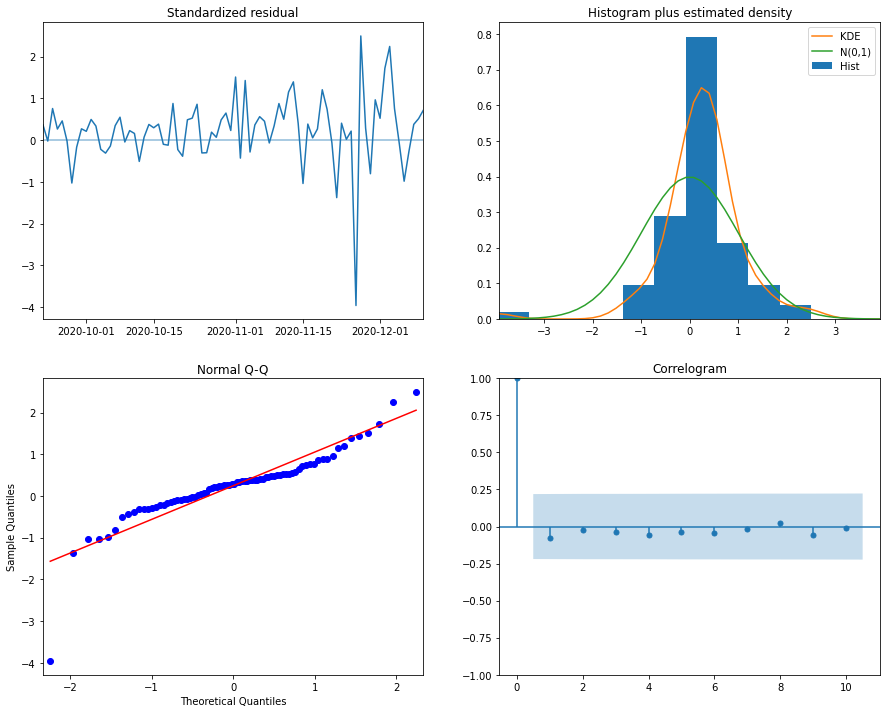

In [74]:
res_w.plot_diagnostics(figsize=(15,12))
plt.show()

In [75]:
pre_w_f = res_w.get_forecast(steps=100)
me_w_f = pre_w_f.predicted_mean
ci_w_f = pre_w_f.conf_int()

### Plotting the predicted cases, actual daily COVID cases and the forecasted cases for next 100 days

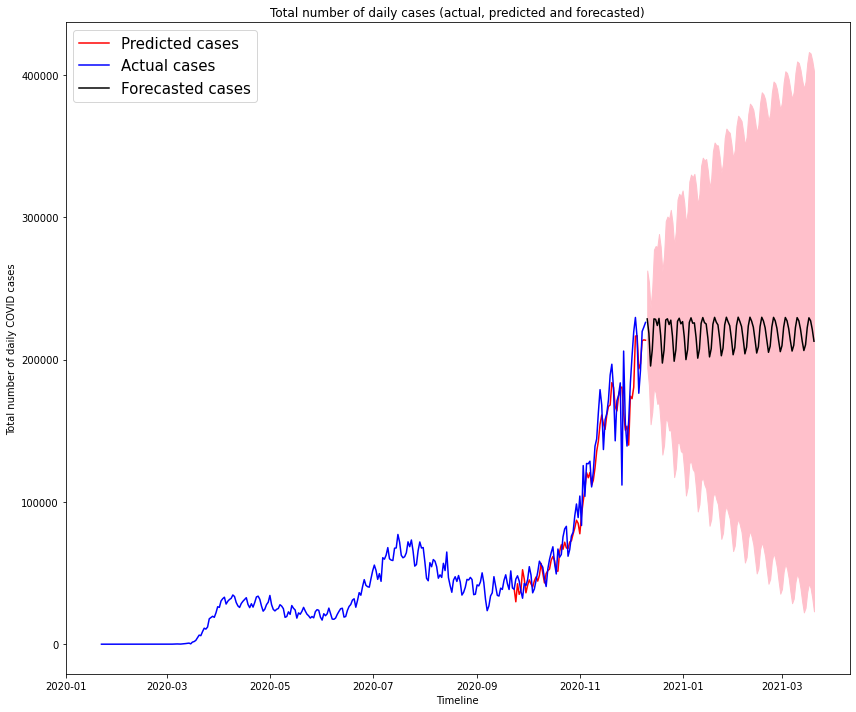

In [76]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(me_w.index, me_w.values,color='red')
ax.plot(s,color='blue')
ax.plot(me_w_f.index, me_w_f.values, color='black')
ax.fill_between(ci_w_f.index, ci_w_f['lower Total'], ci_w_f['upper Total'], color='pink')
ax.legend(['Predicted cases','Actual cases', 'Forecasted cases'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of daily COVID cases")
ax.set_title("Total number of daily cases (actual, predicted and forecasted)")
plt.tight_layout()
plt.show()

In [77]:
s_con = s.cumsum()
me_w_con = me_w.cumsum()
ci_w_con = ci_w.cumsum()

n_me_w_con = me_w_con.add(s_con['2020-09-23'])

me_w_f_con = me_w_f.cumsum()
ci_w_f_con = ci_w_f.cumsum()

n_me_w_f_con = me_w_f_con.add(me_w_con[-1])
n_ci_w_f_con = ci_w_f_con.add(me_w_con[-1])

n2_me_w_f_con = n_me_w_f_con.add(s_con['2020-09-23'])
n2_ci_w_f_con = n_ci_w_f_con.add(s_con['2020-09-23'])

### Plotting the predicted cases, actual cumulative COVID cases and the forecasted cases for next 100 days

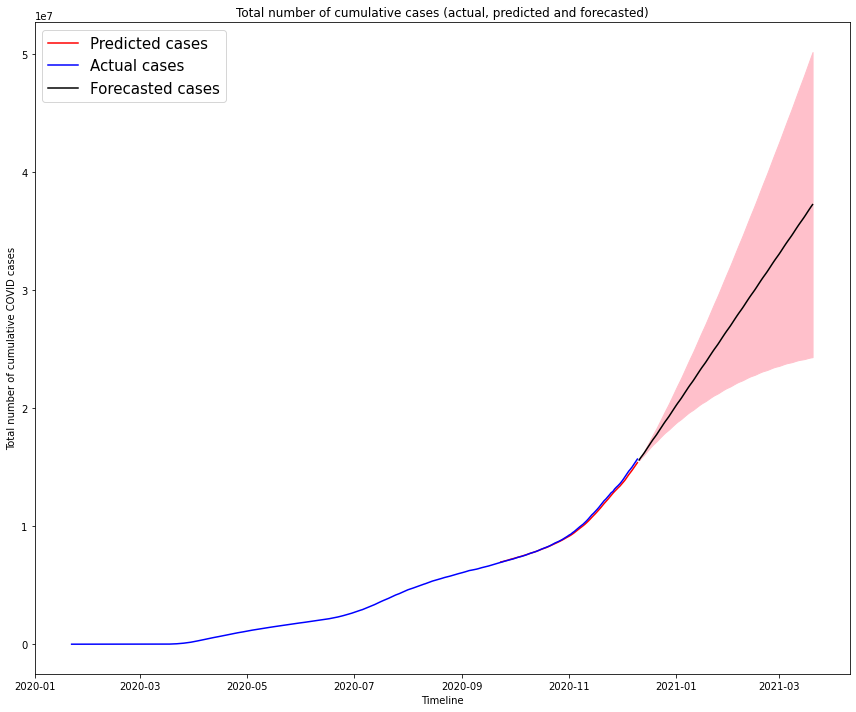

In [78]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(n_me_w_con.index, n_me_w_con.values,color='red')
ax.plot(s_con,color='blue')
ax.plot(n2_me_w_f_con.index, n2_me_w_f_con.values, color='black')
ax.fill_between(n2_ci_w_f_con.index, n2_ci_w_f_con['lower Total'], n2_ci_w_f_con['upper Total'], color='pink')
ax.legend(['Predicted cases','Actual cases', 'Forecasted cases'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of cumulative COVID cases")
ax.set_title("Total number of cumulative cases (actual, predicted and forecasted)")
plt.tight_layout()
plt.show()

#### Case 4 (The best case is forecasted by feeding the data which is showing the best trend)

In [79]:
td_i = int(round(len(s)*0.55,0))
td_l = int(round(len(s)*0.75,0))
train_b = s[td_i:td_l]

In [80]:
model1 = SARIMAX(train_b,order=(5,1,5))
res_b=model1.fit()
pre_b = res_b.get_prediction(start=-63)
pre_b_f = res_b.get_forecast(steps=150)
me_b = pre_b.predicted_mean
me_b_f = pre_b_f.predicted_mean
ci_b = pre_b.conf_int()
ci_b_f = pre_b_f.conf_int()
print(res_b.summary())

                           Statespace Model Results                           
Dep. Variable:                  Total   No. Observations:                   65
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -647.275
Date:                Sat, 19 Dec 2020   AIC                           1316.551
Time:                        12:16:53   BIC                           1340.298
Sample:                    07-18-2020   HQIC                          1325.906
                         - 09-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3995      0.124     -3.233      0.001      -0.642      -0.157
ar.L2         -0.7559      0.165     -4.578      0.000      -1.080      -0.432
ar.L3         -0.3706      0.252     -1.473      0.1

#### Plotting the model diagnostics

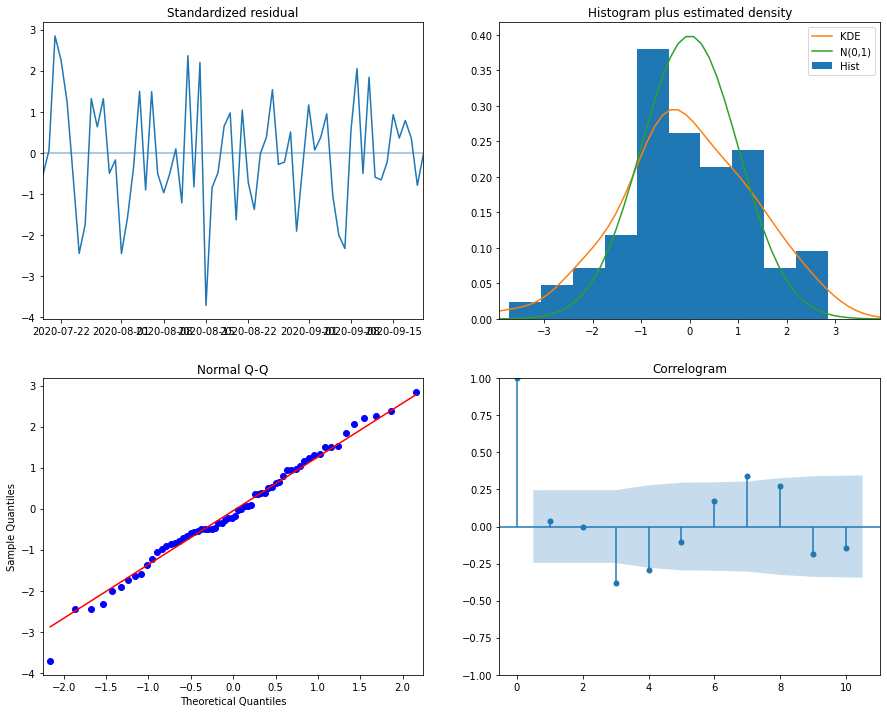

In [81]:
res_b.plot_diagnostics(figsize=(15,12))
plt.show()

In [82]:
pre_b_f = res_b.get_forecast(steps=150)
me_b_f = pre_b_f.predicted_mean
ci_b_f = pre_b_f.conf_int()

### Plotting the predicted cases, actual daily COVID cases and the forecasted cases for next 150 days

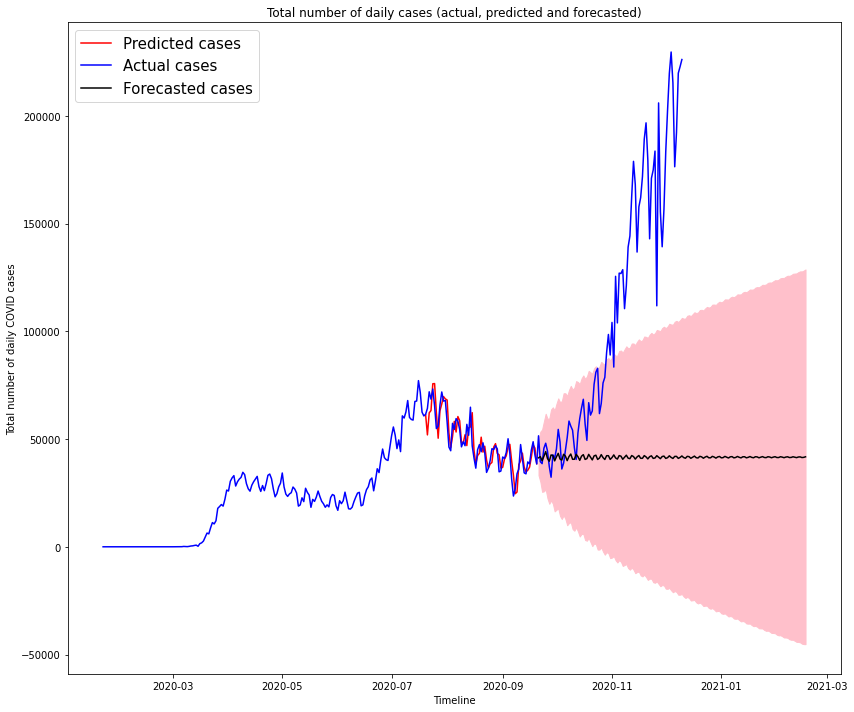

In [83]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(me_b.index, me_b.values,color='red')
ax.plot(s,color='blue')
ax.plot(me_b_f.index, me_b_f.values, color='black')
ax.fill_between(ci_b_f.index, ci_b_f['lower Total'], ci_b_f['upper Total'], color='pink')
ax.legend(['Predicted cases','Actual cases', 'Forecasted cases'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of daily COVID cases")
ax.set_title("Total number of daily cases (actual, predicted and forecasted)")
plt.tight_layout()
plt.show()

In [84]:
s_con = s.cumsum()
me_b_con = me_b.cumsum()
ci_b_con = ci_b.cumsum()

n_me_b_con = me_b_con.add(s_con['2020-07-20'])

me_b_f_con = me_b_f.cumsum()
ci_b_f_con = ci_b_f.cumsum()

n_me_b_f_con = me_b_f_con.add(me_b_con[-1])
n_ci_b_f_con = ci_b_f_con.add(me_b_con[-1])

n2_me_b_f_con = n_me_b_f_con.add(s_con['2020-07-20'])
n2_ci_b_f_con = n_ci_b_f_con.add(s_con['2020-07-20'])

### Plotting the predicted cases, actual cumulative COVID cases and the forecasted cases for next 150 days

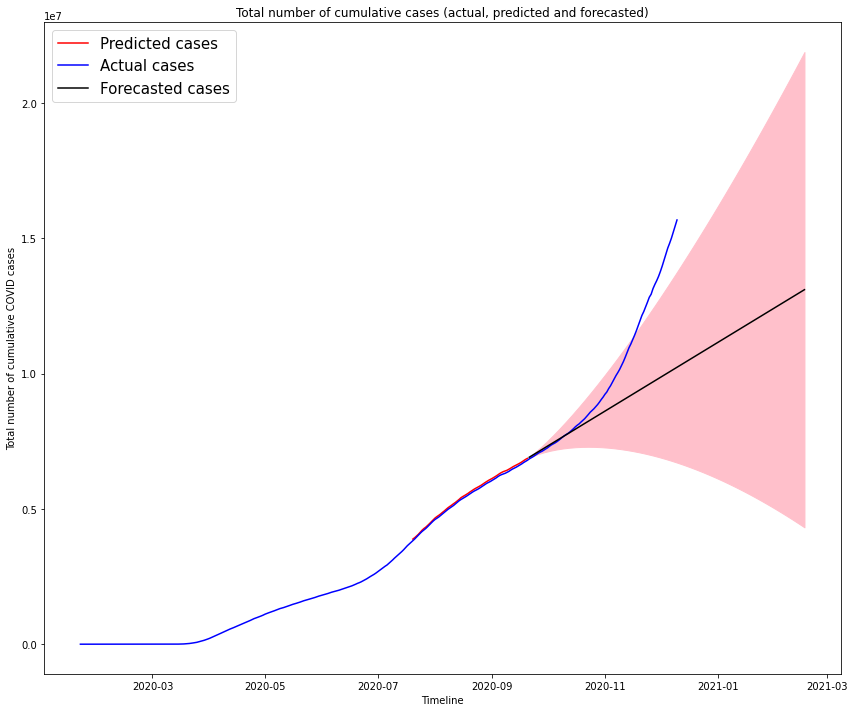

In [85]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(n_me_b_con.index, n_me_b_con.values,color='red')
ax.plot(s_con,color='blue')
ax.plot(n2_me_b_f_con.index, n2_me_b_f_con.values, color='black')
ax.fill_between(n2_ci_b_f_con.index, n2_ci_b_f_con['lower Total'], n2_ci_b_f_con['upper Total'], color='pink')
ax.legend(['Predicted cases','Actual cases', 'Forecasted cases'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of cumulative COVID cases")
ax.set_title("Total number of cumulative cases (actual, predicted and forecasted)")
plt.tight_layout()
plt.show()

## Plotting the three scenarios in 1 graph to analyse the comparison

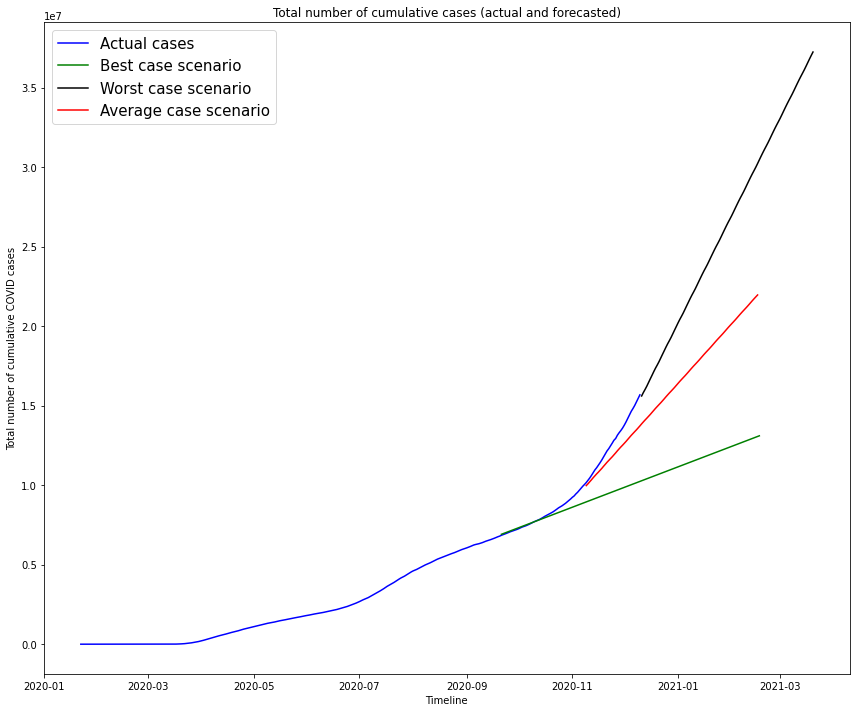

In [86]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(s_con,color='blue')
ax.plot(n2_me_b_f_con.index, n2_me_b_f_con.values, color='green')
ax.plot(n2_me_w_f_con.index, n2_me_w_f_con.values, color='black')
ax.plot(n_me_a_f_con.index, n_me_a_f_con.values, color='red')
ax.legend(['Actual cases','Best case scenario', 'Worst case scenario', 'Average case scenario'],fontsize=15, loc=2)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of cumulative COVID cases")
ax.set_title("Total number of cumulative cases (actual and forecasted)")
plt.tight_layout()
plt.show()

### From this graph the three scenerios can be compared

# Q4. Relating COVID-19 Projections to a Second Dataset

## In this section the dataset containing the measures taken by the US government has been studied

In [87]:
# read and describe the data set

part4_data = pd.read_excel(r'acaps_covid19_government_measures_dataset_0.xlsx', sheet_name='Dataset')
part4_data.head()

,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,4245,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,MoPH begins announcements on their facebook to...,NaN,2020-01-24,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...,2020-04-07,NaN
1,4246,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,checked,Health teams at airports will check passengers...,NaN,2020-01-26,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...,2020-04-07,NaN
2,4247,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,International flights suspension,checked,Flights to China are suspended.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
3,4248,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,NaN,Health screenings of all passengers at airports.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
4,23,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,Border checks,checked,All China and Iran nationals,NaN,2020-02-01,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,2020-03-14,NaN


In [88]:
part4_data.describe()

,ID,PCODE
count,23923.000000,0.0
mean,41893.330352,NaN
std,55912.741814,NaN
min,1.000000,NaN
25%,6048.500000,NaN
50%,12146.000000,NaN
75%,117975.500000,NaN
max,142838.000000,NaN


In [89]:
part4_data['COUNTRY'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', "CÃ´te d'Ivoire",
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'CAR', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'DPRK', 'DRC',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong', 'Hunga

### Segregating the data for US

In [90]:
united = part4_data[part4_data['COUNTRY']=='United States']
united

,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
22876,6934,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,"White House, CDC and Health and Human Services...",Not applicable,NaT,"White House, CDC, HHS",Government,https://www.coronavirus.gov/,2020-04-21,NaN
22877,17210,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,checked,Psychological & social support for teens,Not applicable,2020-01-07,CDC,Government,https://www.cdc.gov/coronavirus/2019-ncov/dail...,2020-08-20,NaN
22878,17211,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,checked,Psychological & social support for children,Not applicable,2020-01-07,CDC,Government,https://www.cdc.gov/coronavirus/2019-ncov/dail...,2020-08-20,NaN
22879,2508,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,NaN,CDC activated its Emergency Operations Center ...,Not applicable,2020-01-21,CDC,Government,https://www.cdc.gov/coronavirus/2019-ncov/case...,2020-03-26,NaN
22880,2512,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,"CDC Grows SARS-CoV-2, the virus that causes CO...",Not applicable,2020-01-22,CDC,Government,https://tools.cdc.gov/medialibrary/index.aspx#...,2020-03-26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23358,142535,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,NaN,"H.R. 8472, the â€œImpact Aid Coronavirus Relie...",Not applicable,2020-12-04,White House,Government,https://www.whitehouse.gov/briefings-statement...,2020-12-07,NaN
23359,142566,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,FDA Authorizes First COVID-19 and Flu Combinat...,Not applicable,2020-12-04,FDA,Government,https://www.fda.gov/news-events/press-announce...,2020-12-07,NaN
23360,142567,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,Emergency Use Authorization (EUA) for the Lumi...,Not applicable,2020-12-04,FDA,Government,https://www.fda.gov/news-events/press-announce...,2020-12-07,NaN
23361,142576,USA,United States,Americas,NaN,NaN,Introduction / extension of measures,Public health measures,General recommendations,checked,COVID-19 Case Investigation and Contact Tracin...,Not applicable,2020-12-04,CDC,Government,https://www.cdc.gov/coronavirus/2019-ncov/php/...,2020-12-07,NaN


### Cleaning the dataset

In [91]:
# Dropping the unnecessary columns

united = united.drop(['ID','ISO','COUNTRY','ADMIN_LEVEL_NAME','PCODE','SOURCE','SOURCE_TYPE','LINK','Alternative source','ENTRY_DATE','NON_COMPLIANCE'],axis=1)
united

,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,DATE_IMPLEMENTED
22876,Americas,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,"White House, CDC and Health and Human Services...",NaT
22877,Americas,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,checked,Psychological & social support for teens,2020-01-07
22878,Americas,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,checked,Psychological & social support for children,2020-01-07
22879,Americas,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,NaN,CDC activated its Emergency Operations Center ...,2020-01-21
22880,Americas,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,"CDC Grows SARS-CoV-2, the virus that causes CO...",2020-01-22
...,...,...,...,...,...,...,...
23358,Americas,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,NaN,"H.R. 8472, the â€œImpact Aid Coronavirus Relie...",2020-12-04
23359,Americas,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,FDA Authorizes First COVID-19 and Flu Combinat...,2020-12-04
23360,Americas,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,Emergency Use Authorization (EUA) for the Lumi...,2020-12-04
23361,Americas,Introduction / extension of measures,Public health measures,General recommendations,checked,COVID-19 Case Investigation and Contact Tracin...,2020-12-04


In [92]:
united['REGION'].unique()

array(['Americas'], dtype=object)

In [93]:
united['TARGETED_POP_GROUP'].unique()

array([nan, 'checked'], dtype=object)

In [94]:
united = united.drop(['REGION','TARGETED_POP_GROUP'],axis=1).reset_index()
united

,index,LOG_TYPE,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED
0,22876,Introduction / extension of measures,Public health measures,Awareness campaigns,"White House, CDC and Health and Human Services...",NaT
1,22877,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for teens,2020-01-07
2,22878,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for children,2020-01-07
3,22879,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,CDC activated its Emergency Operations Center ...,2020-01-21
4,22880,Introduction / extension of measures,Public health measures,Strengthening the public health system,"CDC Grows SARS-CoV-2, the virus that causes CO...",2020-01-22
...,...,...,...,...,...,...
482,23358,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,"H.R. 8472, the â€œImpact Aid Coronavirus Relie...",2020-12-04
483,23359,Introduction / extension of measures,Public health measures,Strengthening the public health system,FDA Authorizes First COVID-19 and Flu Combinat...,2020-12-04
484,23360,Introduction / extension of measures,Public health measures,Strengthening the public health system,Emergency Use Authorization (EUA) for the Lumi...,2020-12-04
485,23361,Introduction / extension of measures,Public health measures,General recommendations,COVID-19 Case Investigation and Contact Tracin...,2020-12-04


In [95]:
united = united.drop(['index'],axis=1)
united

,LOG_TYPE,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED
0,Introduction / extension of measures,Public health measures,Awareness campaigns,"White House, CDC and Health and Human Services...",NaT
1,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for teens,2020-01-07
2,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for children,2020-01-07
3,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,CDC activated its Emergency Operations Center ...,2020-01-21
4,Introduction / extension of measures,Public health measures,Strengthening the public health system,"CDC Grows SARS-CoV-2, the virus that causes CO...",2020-01-22
...,...,...,...,...,...
482,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,"H.R. 8472, the â€œImpact Aid Coronavirus Relie...",2020-12-04
483,Introduction / extension of measures,Public health measures,Strengthening the public health system,FDA Authorizes First COVID-19 and Flu Combinat...,2020-12-04
484,Introduction / extension of measures,Public health measures,Strengthening the public health system,Emergency Use Authorization (EUA) for the Lumi...,2020-12-04
485,Introduction / extension of measures,Public health measures,General recommendations,COVID-19 Case Investigation and Contact Tracin...,2020-12-04


In [96]:
# Coverting the dates in the dataset to DateTime format

formatted_df = united["DATE_IMPLEMENTED"].dt.strftime("%d-%m-%y")
formatted_df

0           NaT
1      07-01-20
2      07-01-20
3      21-01-20
4      22-01-20
         ...   
482    04-12-20
483    04-12-20
484    04-12-20
485    04-12-20
486    04-12-20
Name: DATE_IMPLEMENTED, Length: 487, dtype: object

In [97]:
united.insert(5,'Date_implemented',formatted_df)
united

,LOG_TYPE,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED,Date_implemented
0,Introduction / extension of measures,Public health measures,Awareness campaigns,"White House, CDC and Health and Human Services...",NaT,NaT
1,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for teens,2020-01-07,07-01-20
2,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for children,2020-01-07,07-01-20
3,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,CDC activated its Emergency Operations Center ...,2020-01-21,21-01-20
4,Introduction / extension of measures,Public health measures,Strengthening the public health system,"CDC Grows SARS-CoV-2, the virus that causes CO...",2020-01-22,22-01-20
...,...,...,...,...,...,...
482,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,"H.R. 8472, the â€œImpact Aid Coronavirus Relie...",2020-12-04,04-12-20
483,Introduction / extension of measures,Public health measures,Strengthening the public health system,FDA Authorizes First COVID-19 and Flu Combinat...,2020-12-04,04-12-20
484,Introduction / extension of measures,Public health measures,Strengthening the public health system,Emergency Use Authorization (EUA) for the Lumi...,2020-12-04,04-12-20
485,Introduction / extension of measures,Public health measures,General recommendations,COVID-19 Case Investigation and Contact Tracin...,2020-12-04,04-12-20


In [98]:
united = united.drop(['DATE_IMPLEMENTED'],axis=1)
united

,LOG_TYPE,CATEGORY,MEASURE,COMMENTS,Date_implemented
0,Introduction / extension of measures,Public health measures,Awareness campaigns,"White House, CDC and Health and Human Services...",NaT
1,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for teens,07-01-20
2,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for children,07-01-20
3,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,CDC activated its Emergency Operations Center ...,21-01-20
4,Introduction / extension of measures,Public health measures,Strengthening the public health system,"CDC Grows SARS-CoV-2, the virus that causes CO...",22-01-20
...,...,...,...,...,...
482,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,"H.R. 8472, the â€œImpact Aid Coronavirus Relie...",04-12-20
483,Introduction / extension of measures,Public health measures,Strengthening the public health system,FDA Authorizes First COVID-19 and Flu Combinat...,04-12-20
484,Introduction / extension of measures,Public health measures,Strengthening the public health system,Emergency Use Authorization (EUA) for the Lumi...,04-12-20
485,Introduction / extension of measures,Public health measures,General recommendations,COVID-19 Case Investigation and Contact Tracin...,04-12-20


In [99]:
united = united.set_index(['Date_implemented'])
united

,LOG_TYPE,CATEGORY,MEASURE,COMMENTS
Date_implemented,,,,
NaT,Introduction / extension of measures,Public health measures,Awareness campaigns,"White House, CDC and Health and Human Services..."
07-01-20,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for teens
07-01-20,Introduction / extension of measures,Public health measures,Psychological assistance and medical social work,Psychological & social support for children
21-01-20,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,CDC activated its Emergency Operations Center ...
22-01-20,Introduction / extension of measures,Public health measures,Strengthening the public health system,"CDC Grows SARS-CoV-2, the virus that causes CO..."
...,...,...,...,...
04-12-20,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,"H.R. 8472, the â€œImpact Aid Coronavirus Relie..."
04-12-20,Introduction / extension of measures,Public health measures,Strengthening the public health system,FDA Authorizes First COVID-19 and Flu Combinat...
04-12-20,Introduction / extension of measures,Public health measures,Strengthening the public health system,Emergency Use Authorization (EUA) for the Lumi...


### Slicing the dataset for the data between the months of March and November

### We are doing so, because all the major trends in the COVID cases are visible/significant during this period

In [100]:
sorted = united.loc['01-03-20' : '03-11-20']
sorted

,LOG_TYPE,CATEGORY,MEASURE,COMMENTS
Date_implemented,,,,
01-03-20,Introduction / extension of measures,Governance and socio-economic measures,State of emergency declared,national emergency declared
02-03-20,Introduction / extension of measures,Public health measures,Strengthening the public health system,Interim Guidance for Healthcare Facilities: Pr...
02-03-20,Introduction / extension of measures,Governance and socio-economic measures,Economic measures,commitment of $37 million in financing from th...
02-03-20,Introduction / extension of measures,Public health measures,Strengthening the public health system,FDA and CDC take action to increase access to...
04-03-20,Introduction / extension of measures,Governance and socio-economic measures,Economic measures,HHS Announces Initial Funding to Jurisdictions...
...,...,...,...,...
02-11-20,Introduction / extension of measures,Public health measures,General recommendations,FAQs: Funeral and Burial Services for American...
02-11-20,Introduction / extension of measures,Public health measures,Strengthening the public health system,Vaccine Storage and Handling Toolkit
03-11-20,Phase-out measure,Social distancing,Closure of businesses and public services,Passport Operations in Response to COVID-19. Y...


### Sorting and Grouping the data based on the type of measures taken by the US government

In [101]:
sort1 = sorted.groupby('MEASURE').count()
sort1

,LOG_TYPE,CATEGORY,COMMENTS
MEASURE,,,
Awareness campaigns,34,34,34
Border checks,1,1,1
Border closure,9,9,9
Closure of businesses and public services,6,6,6
Economic measures,73,73,73
Emergency administrative structures activated or established,25,25,25
General recommendations,47,47,47
Health screenings in airports and border crossings,1,1,1
Isolation and quarantine policies,4,4,4


In [102]:
sort2 = sort1.sort_values(['COMMENTS'],ascending=False)
sort2

,LOG_TYPE,CATEGORY,COMMENTS
MEASURE,,,
Strengthening the public health system,144,144,144
Economic measures,73,73,73
General recommendations,47,47,47
Awareness campaigns,34,34,34
Emergency administrative structures activated or established,25,25,25
Surveillance and monitoring,13,13,13
Visa restrictions,12,12,12
Psychological assistance and medical social work,10,10,10
Border closure,9,9,9


### Out of the various measures taken by the Govenment: Visa restrictions, Border closure, and Isolation and quarantine policies are taken into consideration because they are the ones which can directly impact the spread of COVID in the states of USA

In [103]:
array = ['Visa restrictions', 'Border closure', 'Isolation and quarantine policies']
sort3 = sorted.loc[sorted['MEASURE'].isin(array)]
sort3

,LOG_TYPE,CATEGORY,MEASURE,COMMENTS
Date_implemented,,,,
14-03-20,Introduction / extension of measures,Movement restrictions,Visa restrictions,Non-residents and non-citizens of the US who h...
14-03-20,Introduction / extension of measures,Movement restrictions,Visa restrictions,extensions on suspension of entry and scope/li...
20-03-20,Introduction / extension of measures,Movement restrictions,Border closure,The United States has reached mutual agreement...
26-03-20,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,CDC Statement on Self-Quarantine Guidance for ...
09-04-20,Introduction / extension of measures,Movement restrictions,Border closure,CDC Announces Modifications and Extension of N...
22-04-20,Introduction / extension of measures,Movement restrictions,Visa restrictions,Trump Halts New Green Cards
22-04-20,Introduction / extension of measures,Movement restrictions,Visa restrictions,Proclamation 10014 Limits Entry of Certain Imm...
15-06-20,Introduction / extension of measures,Movement restrictions,Visa restrictions,"With specific exceptions, foreign nationals wh..."
22-06-20,Introduction / extension of measures,Movement restrictions,Visa restrictions,Proclamation 10052 Suspends Entry of Certain H...


In [104]:
shape = sort3.shape
shape

(25, 4)

In [105]:
# Dropping the unnecessary columns

sort4 = sort3.drop(['LOG_TYPE','CATEGORY'],axis=1)
sort4

,MEASURE,COMMENTS
Date_implemented,,
14-03-20,Visa restrictions,Non-residents and non-citizens of the US who h...
14-03-20,Visa restrictions,extensions on suspension of entry and scope/li...
20-03-20,Border closure,The United States has reached mutual agreement...
26-03-20,Isolation and quarantine policies,CDC Statement on Self-Quarantine Guidance for ...
09-04-20,Border closure,CDC Announces Modifications and Extension of N...
22-04-20,Visa restrictions,Trump Halts New Green Cards
22-04-20,Visa restrictions,Proclamation 10014 Limits Entry of Certain Imm...
15-06-20,Visa restrictions,"With specific exceptions, foreign nationals wh..."
22-06-20,Visa restrictions,Proclamation 10052 Suspends Entry of Certain H...


### Studying all the segregated measures taken by the Government and selecting the major ones 

In [106]:
for i in range(shape[0]):
    print(str(i) + '   ')
    print(sort4['COMMENTS'][i])
    print('\n')

0   
Non-residents and non-citizens of the US who have travelled in the last 14 days to: China, Iran, Austria, Belgium, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Italy, Latvia, Liechtenstein, Lithuania, Luxembourg, Malta, Netherlands, Norway, Poland, Portugal, Slovakia, Slovenia, Spain, Sweden or in Switzerland, and the UK


1   
extensions on suspension of entry and scope/limitations of entry (expanded to include UK and Ireland) with many exceptions 


2   
The United States has reached mutual agreements with Canada and Mexico to restrict non-essential travel across our northern and southern borders.
The United States will expeditiously return aliens who cross between ports of entry or are otherwise not allowed to enter the country, as the facilities in which these aliens would normally be held cannot support quarantine for the time needed to assess potential cases.
These aliens are processed in stations designed for short-term processing, where di

### The selected measures are as follows:

In [107]:
print(str('1. ') + sort4['COMMENTS'][0])
print(str('\n') + str('2. ') + sort4['COMMENTS'][2])
print(str('\n') + str('3. ') + sort4['COMMENTS'][7])
print(str('\n') + str('4. ') + sort4['COMMENTS'][8])

1. Non-residents and non-citizens of the US who have travelled in the last 14 days to: China, Iran, Austria, Belgium, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Italy, Latvia, Liechtenstein, Lithuania, Luxembourg, Malta, Netherlands, Norway, Poland, Portugal, Slovakia, Slovenia, Spain, Sweden or in Switzerland, and the UK

2. The United States has reached mutual agreements with Canada and Mexico to restrict non-essential travel across our northern and southern borders.
The United States will expeditiously return aliens who cross between ports of entry or are otherwise not allowed to enter the country, as the facilities in which these aliens would normally be held cannot support quarantine for the time needed to assess potential cases.
These aliens are processed in stations designed for short-term processing, where distancing is not a viable option, creating a serious danger of an outbreak.

3. With specific exceptions, foreign nationals who have been

## Plotting the events (measures) on the COVID cases timeline

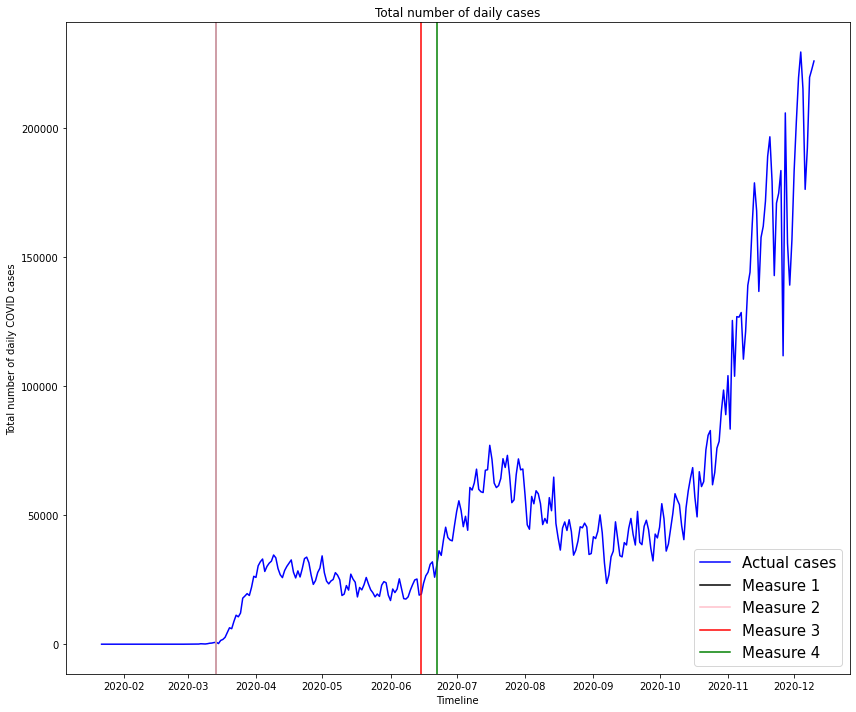

In [108]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(s,color='blue')
plt.axvline(x=sort4.index[0], color= 'black')
plt.axvline(x=sort4.index[1], color= 'pink')
plt.axvline(x=sort4.index[7], color= 'red')
plt.axvline(x=sort4.index[8], color= 'green')
ax.legend(['Actual cases','Measure 1', 'Measure 2','Measure 3', 'Measure 4'],fontsize=15)
ax.set_xlabel("Timeline")
ax.set_ylabel("Total number of daily COVID cases")
ax.set_title("Total number of daily cases")
plt.tight_layout()
plt.show()

# Q5. Deriving insights about policy and guidance to tackle the outbreak based on model findings

### The measures taken by the US Government to reduce the spread of COVID cases were primarily based on restricting the borders to the resident and non-resident US citizens.

### Also the US government reached mutual agreements with Canada and Mexico to restrict non-essential travel with respect to the quarantine and social-distancing norms.

### In the graph plotted in the last section, we can easily analyse how imposing the restrictions helped in curbing the spread of COVID.

### Although for a momentarily basis these restrictions surely helped but a long term policy change is yet to be adhered irrespective of the development and administration of the COVID vaccine.

### The policies with respect to opening the US borders should be as follows:
### 1. The US government should categorize other countries on the basis of active COVID cases in those countries. The countries can be categorized in three groups viz. Green, orange and red.

   ### a. Green: Countries whose active cases have reduced to only 1/10 of what it was originally in those countries
   ### b. Orange: Countries whose active cases are reducing gradually but are still above ⅕ of the original
   ### c. Red: Countries which are not able to reduce the COVID cases or cases are still increasing substantially
   
### According to the above categories the US Government should open its borders for citizens of Green countries only for the period of 3 months, post which it can open the borders for Orange categorised countries. Red ones are those countries whose residents should only be considered post availability of vaccines.

### The quarantine measures should be adhered as soon as a person enters US borders and should be given vaccination at that time only to reduce the covid spread
### The US-Canada and US-Mexico borders must be available with proper vaccination camps and quarantine measures so as to restrict the cases if any at the borders only.